In [1]:
import os
os.chdir("D://Master//10. TFM//Data")

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from scipy.stats import boxcox, probplot, norm, shapiro
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.cluster import KMeans, AffinityPropagation, DBSCAN
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import shapiro, probplot
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster import cluster_visualizer
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
import numpy as np
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

In [3]:
df = pd.read_csv("df.csv")
df.head()

,Unnamed: 0,customer_zip_code_prefix,customer_city,customer_state,price,freight_value,payment_type,payment_value,product_category_name,order_status,review_score,year,month,day_of_week,hour
0,0,28013,campos dos goytacazes,RJ,58.9,13.29,credit_card,72.19,cool_stuff,delivered,5,2017,9,2,8
1,1,75800,jatai,GO,55.9,17.96,boleto,73.86,cool_stuff,delivered,5,2017,6,2,11
2,2,30720,belo horizonte,MG,64.9,18.33,credit_card,83.23,cool_stuff,delivered,4,2018,5,4,10
3,3,83070,sao jose dos pinhais,PR,58.9,16.17,credit_card,75.07,cool_stuff,delivered,5,2017,8,1,18
4,4,36400,conselheiro lafaiete,MG,58.9,13.29,credit_card,72.19,cool_stuff,delivered,5,2017,8,3,21


Eliminamos la variable unnamed que se ha generado con el csv y la variable customer_zip_code_prefix que, siendo categórica, presenta muchos valores distintos y puede perjudicar la calidad de los resultados.

In [4]:
df = df.drop("Unnamed: 0", axis=1)

In [5]:
df = df.drop("customer_zip_code_prefix", axis=1)

In [6]:
df = df.drop("order_status", axis=1)

In [7]:
df = df.drop("hour", axis=1)

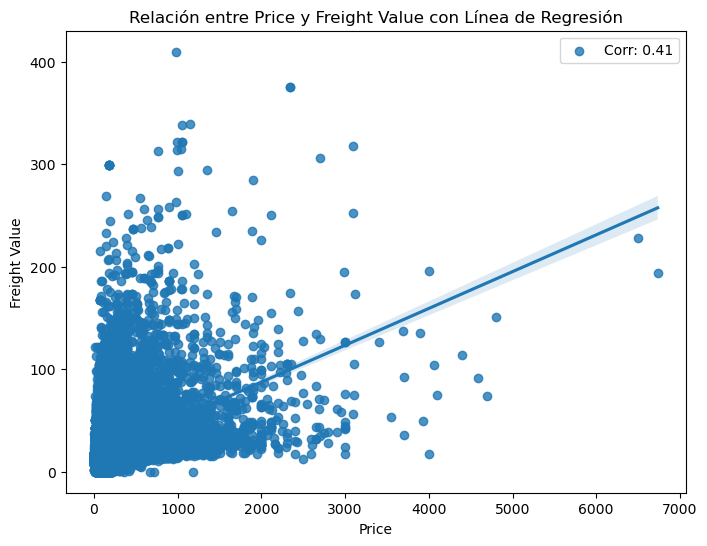

In [8]:
from scipy.stats import pearsonr

# Calcular el coeficiente de correlación
corr_coef, _ = pearsonr(df['price'], df['freight_value'])

# Crear el gráfico de dispersión con línea de regresión
plt.figure(figsize=(8, 6))
sns.regplot(x='price', y='freight_value', data=df, label=f'Corr: {corr_coef:.2f}')
plt.title('Relación entre Price y Freight Value con Línea de Regresión')
plt.xlabel('Price')
plt.ylabel('Freight Value')
plt.legend()
plt.show()

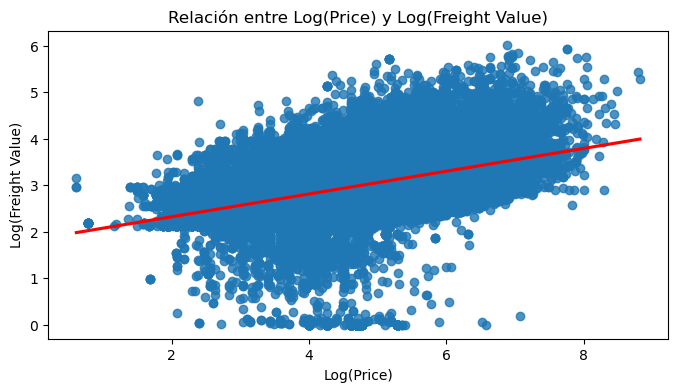

In [9]:
df_log = pd.DataFrame()
df_log['log_price'] = np.log1p(df['price'])
df_log['log_freight_value'] = np.log1p(df['freight_value'])

# Crear el gráfico de dispersión con la transformación logarítmica y cambiar el color de la línea de regresión
plt.figure(figsize=(8, 4))
sns.regplot(x='log_price', y='log_freight_value', data=df_log, line_kws={'color': 'red'})
plt.title('Relación entre Log(Price) y Log(Freight Value)')
plt.xlabel('Log(Price)')
plt.ylabel('Log(Freight Value)')
plt.show()

Ahora, vamos a transformar cada variable categórica en una variable dummy que pueda ser utilizada en los análisis posteriores.

In [10]:
X = df.copy()

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110757 entries, 0 to 110756
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   customer_city          110757 non-null  object 
 1   customer_state         110757 non-null  object 
 2   price                  110757 non-null  float64
 3   freight_value          110757 non-null  float64
 4   payment_type           110757 non-null  object 
 5   payment_value          110757 non-null  float64
 6   product_category_name  110757 non-null  object 
 7   review_score           110757 non-null  int64  
 8   year                   110757 non-null  int64  
 9   month                  110757 non-null  int64  
 10  day_of_week            110757 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 9.3+ MB


In [12]:
X['customer_city'].nunique()

4093

In [13]:
top_cities = X['customer_city'].value_counts().nlargest(10).index

In [14]:
X['customer_city'] = X['customer_city'].apply(lambda x: x if x in top_cities else 'otras ciudades')

In [15]:
X['customer_city'].value_counts().head(11)

otras ciudades           71480
sao paulo                17496
rio de janeiro            7659
belo horizonte            3095
brasilia                  2370
curitiba                  1732
campinas                  1621
porto alegre              1591
salvador                  1366
guarulhos                 1299
sao bernardo do campo     1048
Name: customer_city, dtype: int64

In [16]:
X = pd.get_dummies(X, columns=['customer_city'], prefix='city')

In [17]:
X = pd.get_dummies(X, columns=['customer_state'], prefix='state')

In [18]:
X['product_category_name'].nunique()

73

In [19]:
top_categories = X['product_category_name'].value_counts().nlargest(10).index
top_categories

Index(['cama_mesa_banho', 'beleza_saude', 'esporte_lazer', 'moveis_decoracao',
       'informatica_acessorios', 'utilidades_domesticas', 'relogios_presentes',
       'telefonia', 'ferramentas_jardim', 'automotivo'],
      dtype='object')

In [20]:
X['product_category_name'] = X['product_category_name'].apply(lambda x: x if x in top_categories else 'otras categorias')

In [21]:
X['product_category_name'].value_counts().head(5)

otras categorias    39215
cama_mesa_banho     11136
beleza_saude         9642
esporte_lazer        8638
moveis_decoracao     8328
Name: product_category_name, dtype: int64

In [22]:
X = pd.get_dummies(X, columns=['product_category_name'], prefix='category')

In [23]:
X = pd.get_dummies(X, columns=['payment_type'], prefix='payment')

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110757 entries, 0 to 110756
Data columns (total 61 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   price                            110757 non-null  float64
 1   freight_value                    110757 non-null  float64
 2   payment_value                    110757 non-null  float64
 3   review_score                     110757 non-null  int64  
 4   year                             110757 non-null  int64  
 5   month                            110757 non-null  int64  
 6   day_of_week                      110757 non-null  int64  
 7   city_belo horizonte              110757 non-null  uint8  
 8   city_brasilia                    110757 non-null  uint8  
 9   city_campinas                    110757 non-null  uint8  
 10  city_curitiba                    110757 non-null  uint8  
 11  city_guarulhos                   110757 non-null  uint8  
 12  ci

In [25]:
X['month']=X['month'].astype(np.int16)
X['day_of_week']=X['day_of_week'].astype(np.int16)
X['year']=X['year'].astype(np.int16)

In [26]:
X

,price,freight_value,payment_value,review_score,year,month,day_of_week,city_belo horizonte,city_brasilia,city_campinas,...,category_moveis_decoracao,category_otras categorias,category_relogios_presentes,category_telefonia,category_utilidades_domesticas,payment_boleto,payment_credit_card,payment_debit_card,payment_varios,payment_voucher
0,58.9,13.29,72.19,5,2017,9,2,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,55.9,17.96,73.86,5,2017,6,2,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,64.9,18.33,83.23,4,2018,5,4,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3,58.9,16.17,75.07,5,2017,8,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,58.9,13.29,72.19,5,2017,8,3,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110752,129.9,51.20,181.10,5,2018,7,4,0,0,0,...,0,0,0,0,0,0,1,0,0,0
110753,99.0,13.52,112.52,4,2018,8,5,0,0,0,...,1,0,0,0,0,0,1,0,0,0
110754,736.0,20.91,756.91,5,2017,6,3,0,0,0,...,0,0,1,0,0,0,1,0,0,0
110755,229.9,44.02,273.92,4,2017,12,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [27]:
X.nunique()

price                   5882
freight_value           6954
payment_value          27306
review_score               5
year                       3
                       ...  
payment_boleto             2
payment_credit_card        2
payment_debit_card         2
payment_varios             2
payment_voucher            2
Length: 61, dtype: int64

### Estandarización

In [28]:
scaler = MinMaxScaler(feature_range=(0, 1))
x_estandarizado = scaler.fit_transform(X)
x_estandarizado = pd.DataFrame(x_estandarizado,columns=X.columns)
x_estandarizado.head()

,price,freight_value,payment_value,review_score,year,month,day_of_week,city_belo horizonte,city_brasilia,city_campinas,...,category_moveis_decoracao,category_otras categorias,category_relogios_presentes,category_telefonia,category_utilidades_domesticas,payment_boleto,payment_credit_card,payment_debit_card,payment_varios,payment_voucher
0,0.008620,0.032440,0.004585,1.00,0.5,0.727273,0.333333,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.008175,0.043839,0.004707,1.00,0.5,0.454545,0.333333,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.009511,0.044742,0.005393,0.75,1.0,0.363636,0.666667,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.008620,0.039470,0.004795,1.00,0.5,0.636364,0.166667,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.008620,0.032440,0.004585,1.00,0.5,0.636364,0.500000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [29]:
X.describe()

,price,freight_value,payment_value,review_score,year,month,day_of_week,city_belo horizonte,city_brasilia,city_campinas,...,category_moveis_decoracao,category_otras categorias,category_relogios_presentes,category_telefonia,category_utilidades_domesticas,payment_boleto,payment_credit_card,payment_debit_card,payment_varios,payment_voucher
count,110757.000000,110757.000000,110757.000000,110757.000000,110757.000000,110757.000000,110757.000000,110757.000000,110757.000000,110757.000000,...,110757.000000,110757.000000,110757.000000,110757.000000,110757.000000,110757.000000,110757.00000,110757.000000,110757.000000,110757.000000
mean,120.502017,20.012748,179.979834,4.035284,2017.543243,6.030454,2.747041,0.027944,0.021398,0.014636,...,0.075192,0.354063,0.053721,0.040765,0.062687,0.203175,0.74221,0.014997,0.029028,0.010591
std,181.919374,15.814897,271.122309,1.385395,0.504665,3.225449,1.963285,0.164813,0.144708,0.120090,...,0.263702,0.478231,0.225468,0.197746,0.242400,0.402363,0.43742,0.121540,0.167884,0.102365
min,0.850000,0.000000,9.590000,1.000000,2016.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,39.900000,13.080000,65.690000,4.000000,2017.000000,3.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,74.900000,16.290000,114.180000,5.000000,2018.000000,6.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000
75%,134.900000,21.170000,195.690000,5.000000,2018.000000,8.000000,4.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000
max,6735.000000,409.680000,13664.080000,5.000000,2018.000000,12.000000,6.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [30]:
x_estandarizado.describe()

,price,freight_value,payment_value,review_score,year,month,day_of_week,city_belo horizonte,city_brasilia,city_campinas,...,category_moveis_decoracao,category_otras categorias,category_relogios_presentes,category_telefonia,category_utilidades_domesticas,payment_boleto,payment_credit_card,payment_debit_card,payment_varios,payment_voucher
count,110757.000000,110757.000000,110757.000000,110757.000000,110757.000000,110757.000000,110757.000000,110757.000000,110757.000000,110757.000000,...,110757.000000,110757.000000,110757.000000,110757.000000,110757.000000,110757.000000,110757.00000,110757.000000,110757.000000,110757.000000
mean,0.017768,0.048850,0.012479,0.758821,0.771622,0.457314,0.457840,0.027944,0.021398,0.014636,...,0.075192,0.354063,0.053721,0.040765,0.062687,0.203175,0.74221,0.014997,0.029028,0.010591
std,0.027014,0.038603,0.019856,0.346349,0.252333,0.293223,0.327214,0.164813,0.144708,0.120090,...,0.263702,0.478231,0.225468,0.197746,0.242400,0.402363,0.43742,0.121540,0.167884,0.102365
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.005799,0.031927,0.004109,0.750000,0.500000,0.181818,0.166667,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.010996,0.039763,0.007660,1.000000,1.000000,0.454545,0.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000
75%,0.019906,0.051674,0.013629,1.000000,1.000000,0.636364,0.666667,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


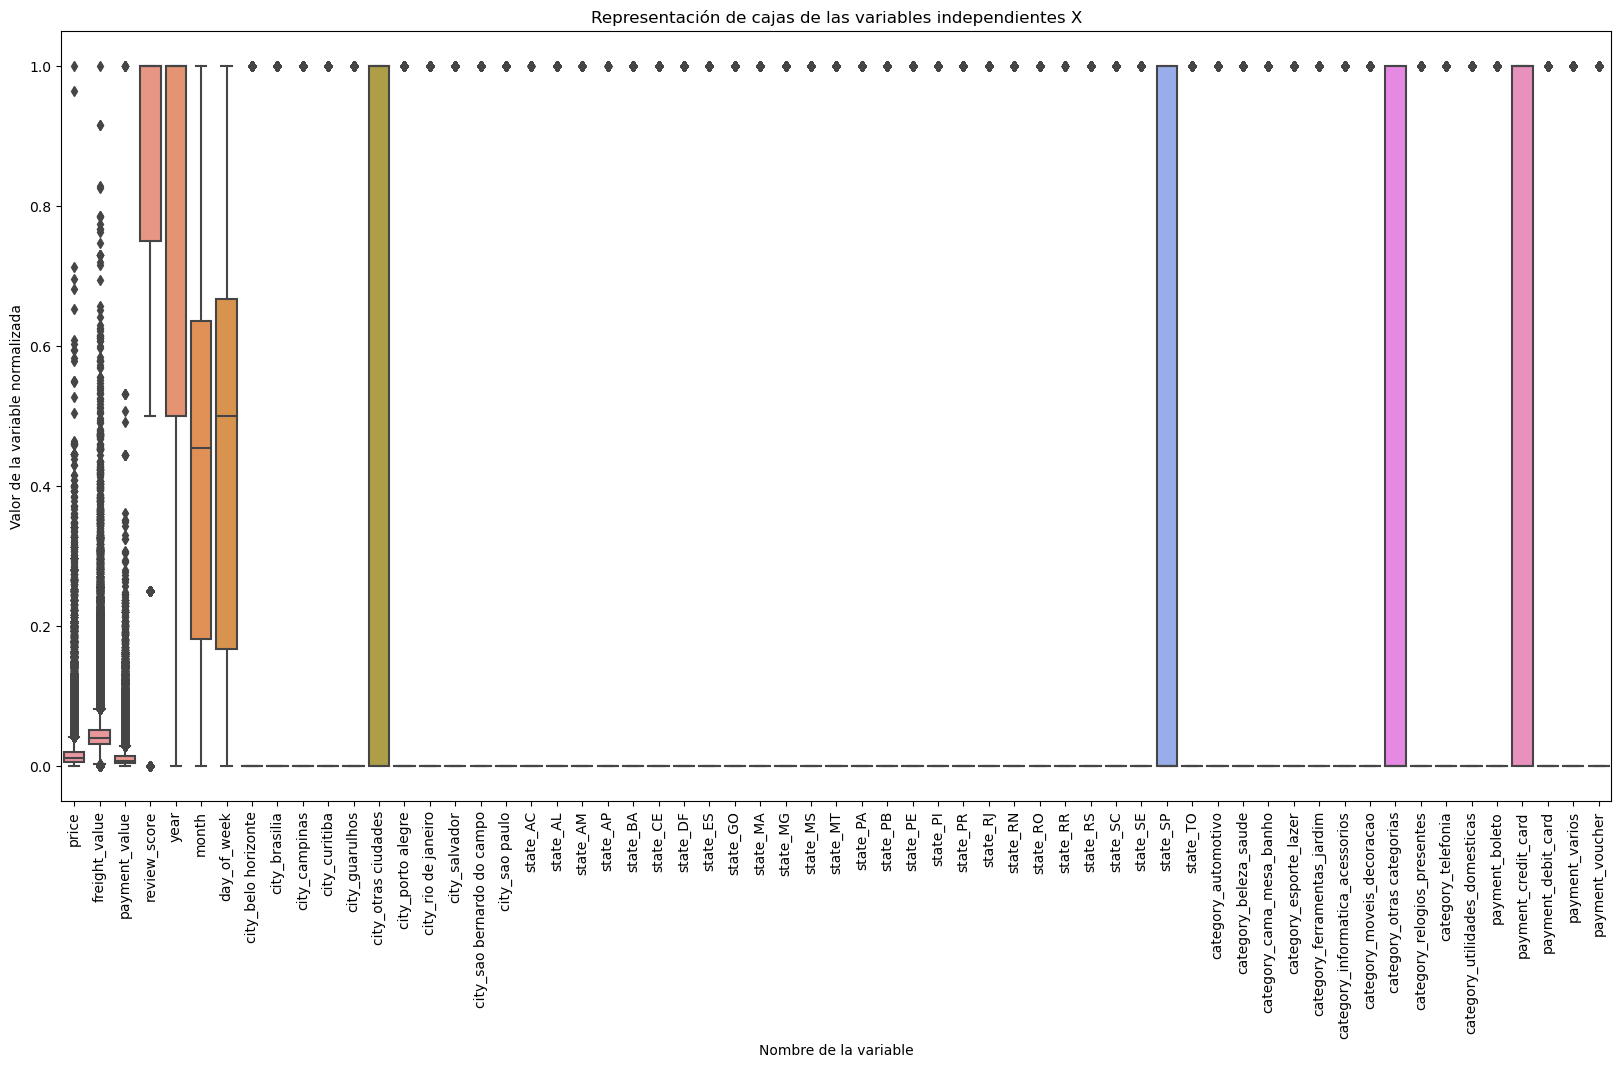

In [31]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(data=x_estandarizado)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title(u'Representación de cajas de las variables independientes X')
plt.ylabel('Valor de la variable normalizada')
_ = plt.xlabel('Nombre de la variable')

In [32]:
x_estandarizado.corr(method='pearson')

,price,freight_value,payment_value,review_score,year,month,day_of_week,city_belo horizonte,city_brasilia,city_campinas,...,category_moveis_decoracao,category_otras categorias,category_relogios_presentes,category_telefonia,category_utilidades_domesticas,payment_boleto,payment_credit_card,payment_debit_card,payment_varios,payment_voucher
price,1.000000,0.412875,0.761766,-0.004421,-0.002269,0.001461,0.002555,-0.006973,0.005019,-0.003842,...,-0.051557,0.049876,0.105787,-0.056234,-0.042299,-0.045526,0.048088,-0.007795,0.005443,-0.026207
freight_value,0.412875,1.000000,0.385303,-0.037308,0.033146,0.004760,0.004507,-0.005957,0.010394,-0.038380,...,0.012765,0.058644,-0.048710,-0.056319,0.016064,-0.009213,0.012670,-0.010385,0.007770,-0.018338
payment_value,0.761766,0.385303,1.000000,-0.085252,0.000858,0.004513,-0.005403,-0.012756,0.000342,-0.008222,...,-0.009087,0.032221,0.051666,-0.055585,-0.021692,-0.005609,0.016424,-0.013285,-0.001352,-0.030143
review_score,-0.004421,-0.037308,-0.085252,1.000000,-0.008161,0.031771,-0.010972,0.002088,-0.003991,0.001400,...,-0.027132,0.027232,-0.002773,-0.013160,0.003684,-0.002430,0.000066,0.010799,-0.001531,-0.001043
year,-0.002269,0.033146,0.000858,-0.008161,1.000000,-0.553535,-0.017049,0.002894,0.004638,0.002742,...,-0.033253,-0.021297,0.034970,-0.012915,0.018102,-0.025238,0.020846,0.043965,-0.022222,-0.005632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
payment_boleto,-0.045526,-0.009213,-0.005609,-0.002430,-0.025238,0.001563,-0.049955,-0.011958,-0.005819,0.003672,...,0.003826,-0.004762,-0.019197,0.010969,-0.008576,1.000000,-0.856809,-0.062307,-0.087308,-0.052243
payment_credit_card,0.048088,0.012670,0.016424,0.000066,0.020846,-0.004335,0.046917,0.014134,0.009123,-0.002771,...,-0.004237,0.002729,0.020859,-0.012534,0.002370,-0.856809,1.000000,-0.209368,-0.293381,-0.175552
payment_debit_card,-0.007795,-0.010385,-0.013285,0.010799,0.043965,0.007218,0.000195,-0.001539,-0.009519,0.002901,...,-0.006449,-0.000015,-0.008643,0.004617,0.003027,-0.062307,-0.209368,1.000000,-0.021334,-0.012766
payment_varios,0.005443,0.007770,-0.001352,-0.001531,-0.022222,0.003870,0.000336,-0.005821,-0.004012,-0.002263,...,0.004947,0.001089,-0.001124,0.001072,0.008977,-0.087308,-0.293381,-0.021334,1.000000,-0.017889


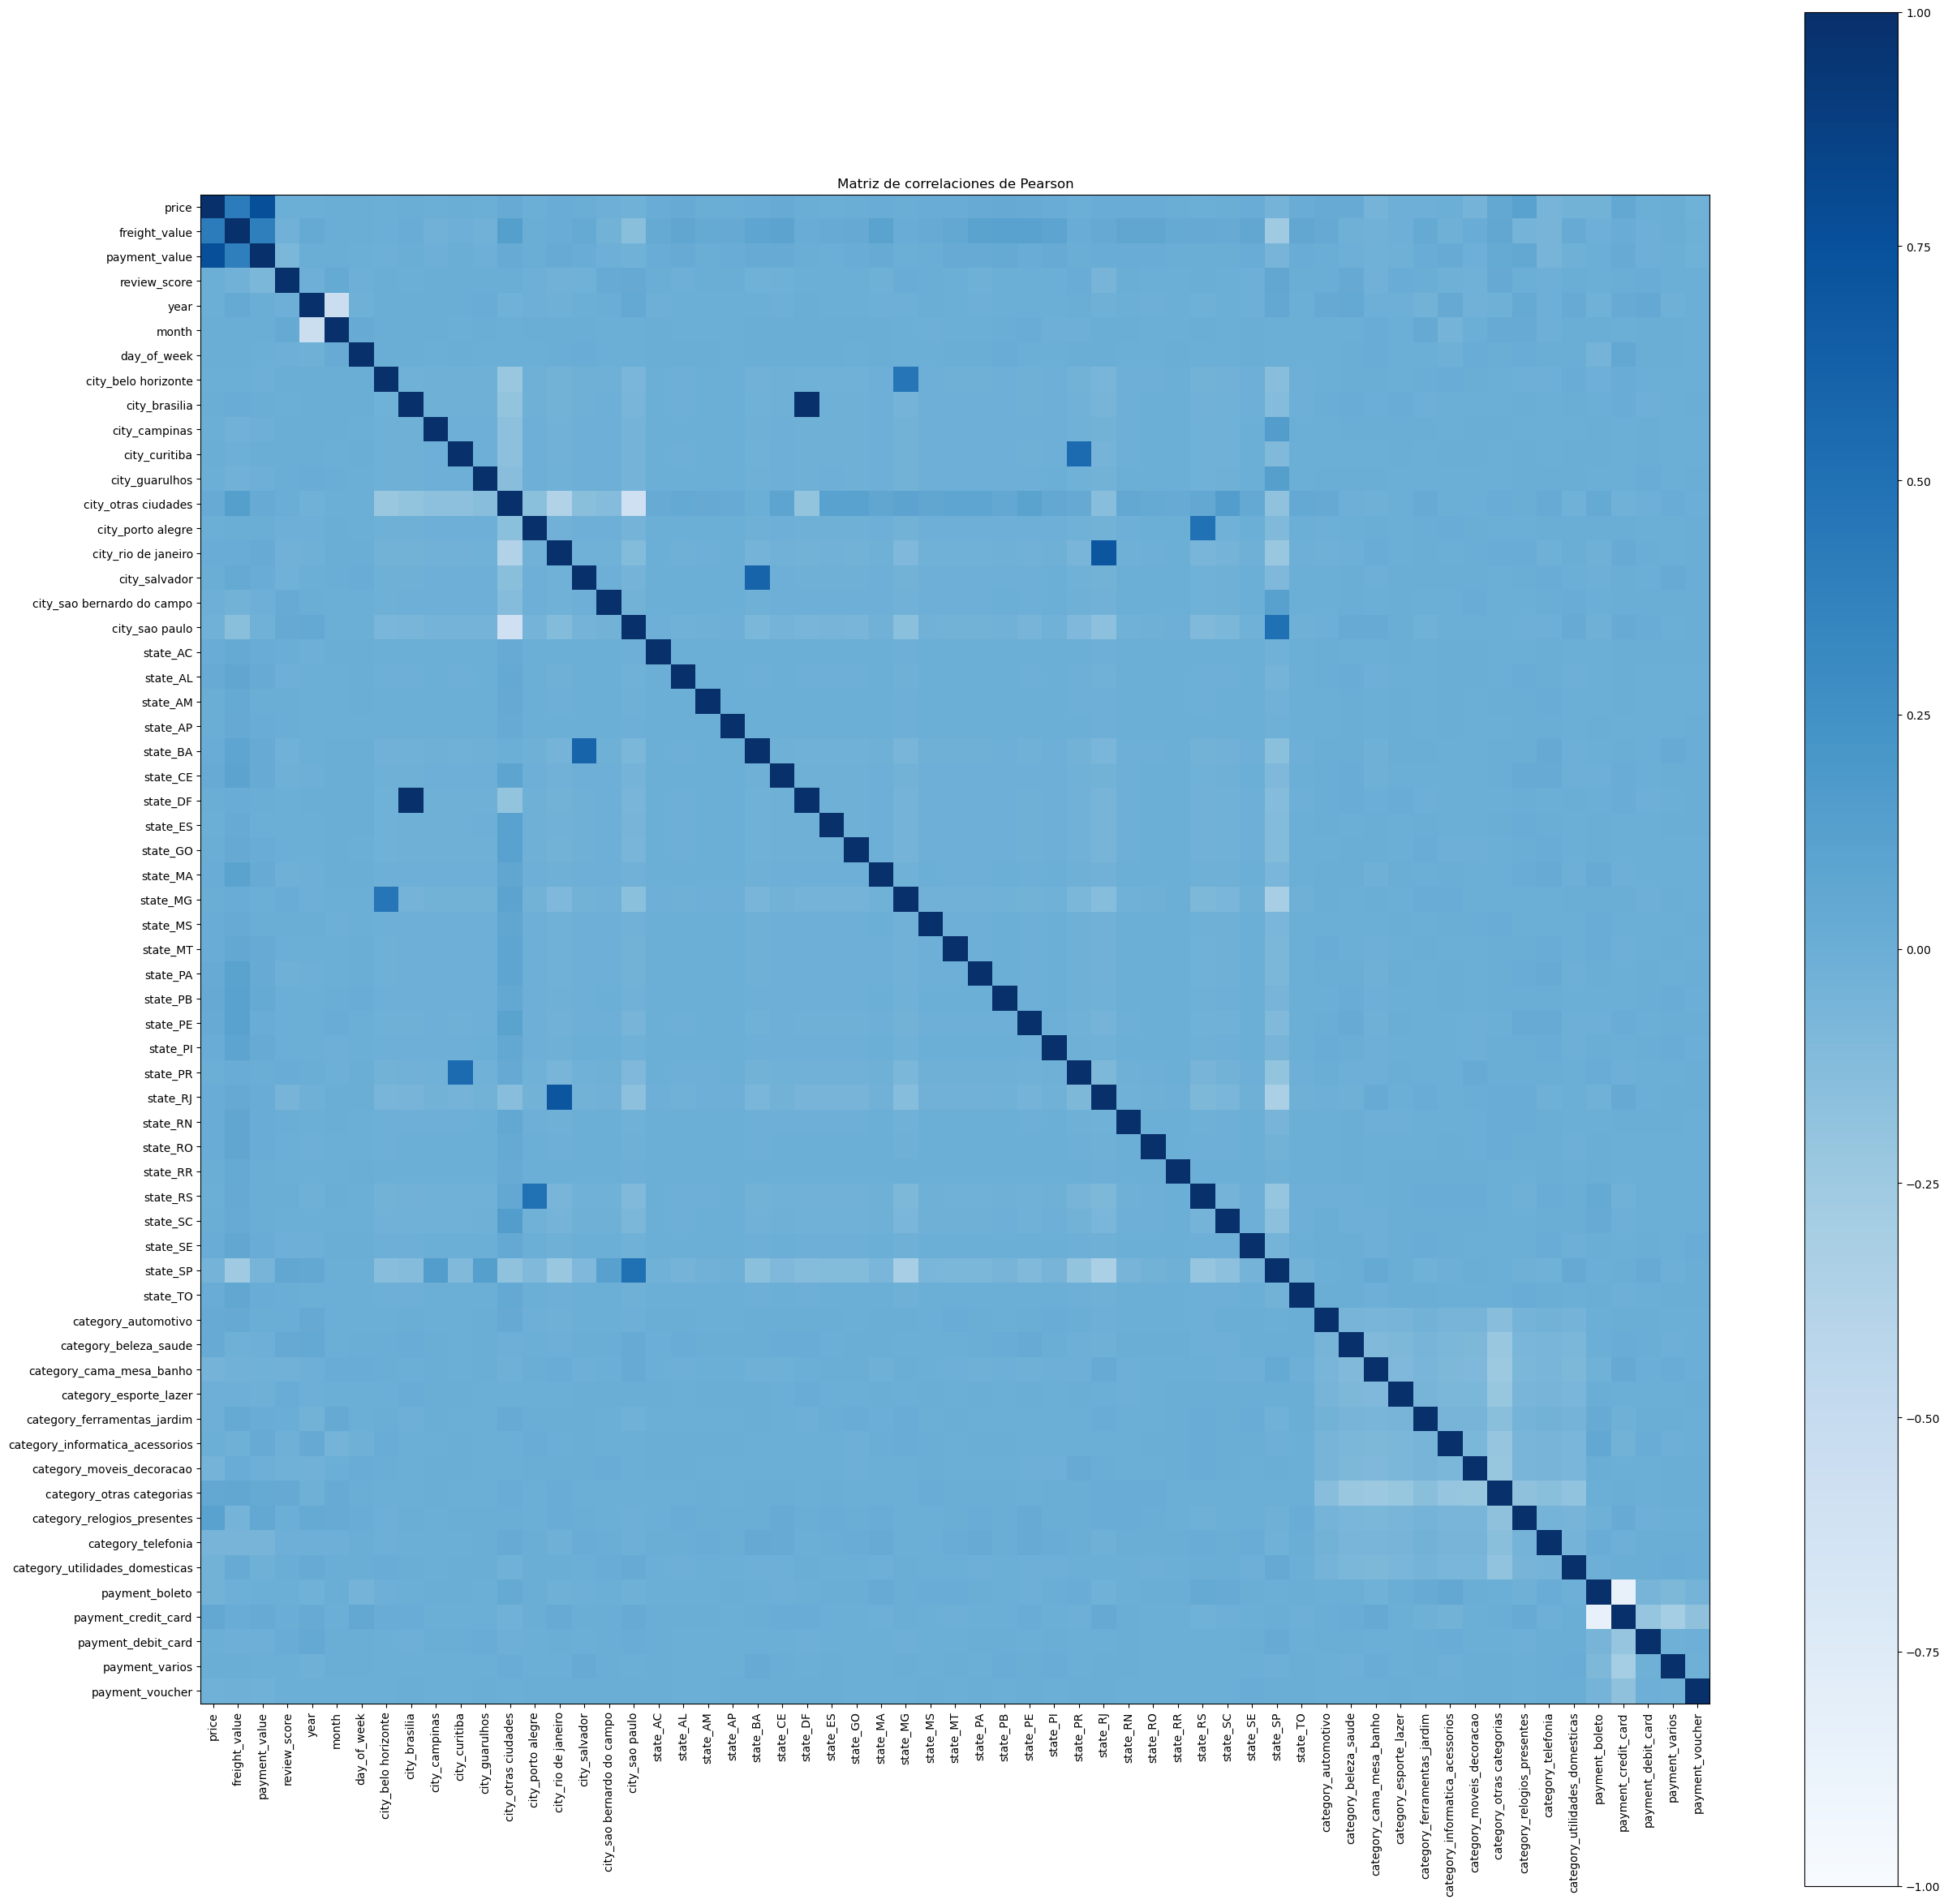

In [33]:
matriz_correlaciones = x_estandarizado.corr(method='pearson')
n_ticks = len(x_estandarizado.columns)
plt.figure( figsize=(30, 30) )
plt.xticks(range(n_ticks), x_estandarizado.columns, rotation='vertical')
plt.yticks(range(n_ticks), x_estandarizado.columns)
plt.colorbar(plt.imshow(matriz_correlaciones, interpolation='nearest', 
                            vmin=-1., vmax=1., 
                            cmap=plt.get_cmap('Blues')))
_ = plt.title('Matriz de correlaciones de Pearson')

Se observa una gran correlación entre las variables price, freight_value y payment_value. Como Payment_value es la suma de price y freight_value, podemos eliminarla de cara al análisis.

In [34]:
x_estandarizado = x_estandarizado.drop("payment_value", axis=1)

In [35]:
x_estandarizado = x_estandarizado.drop("freight_value", axis=1)

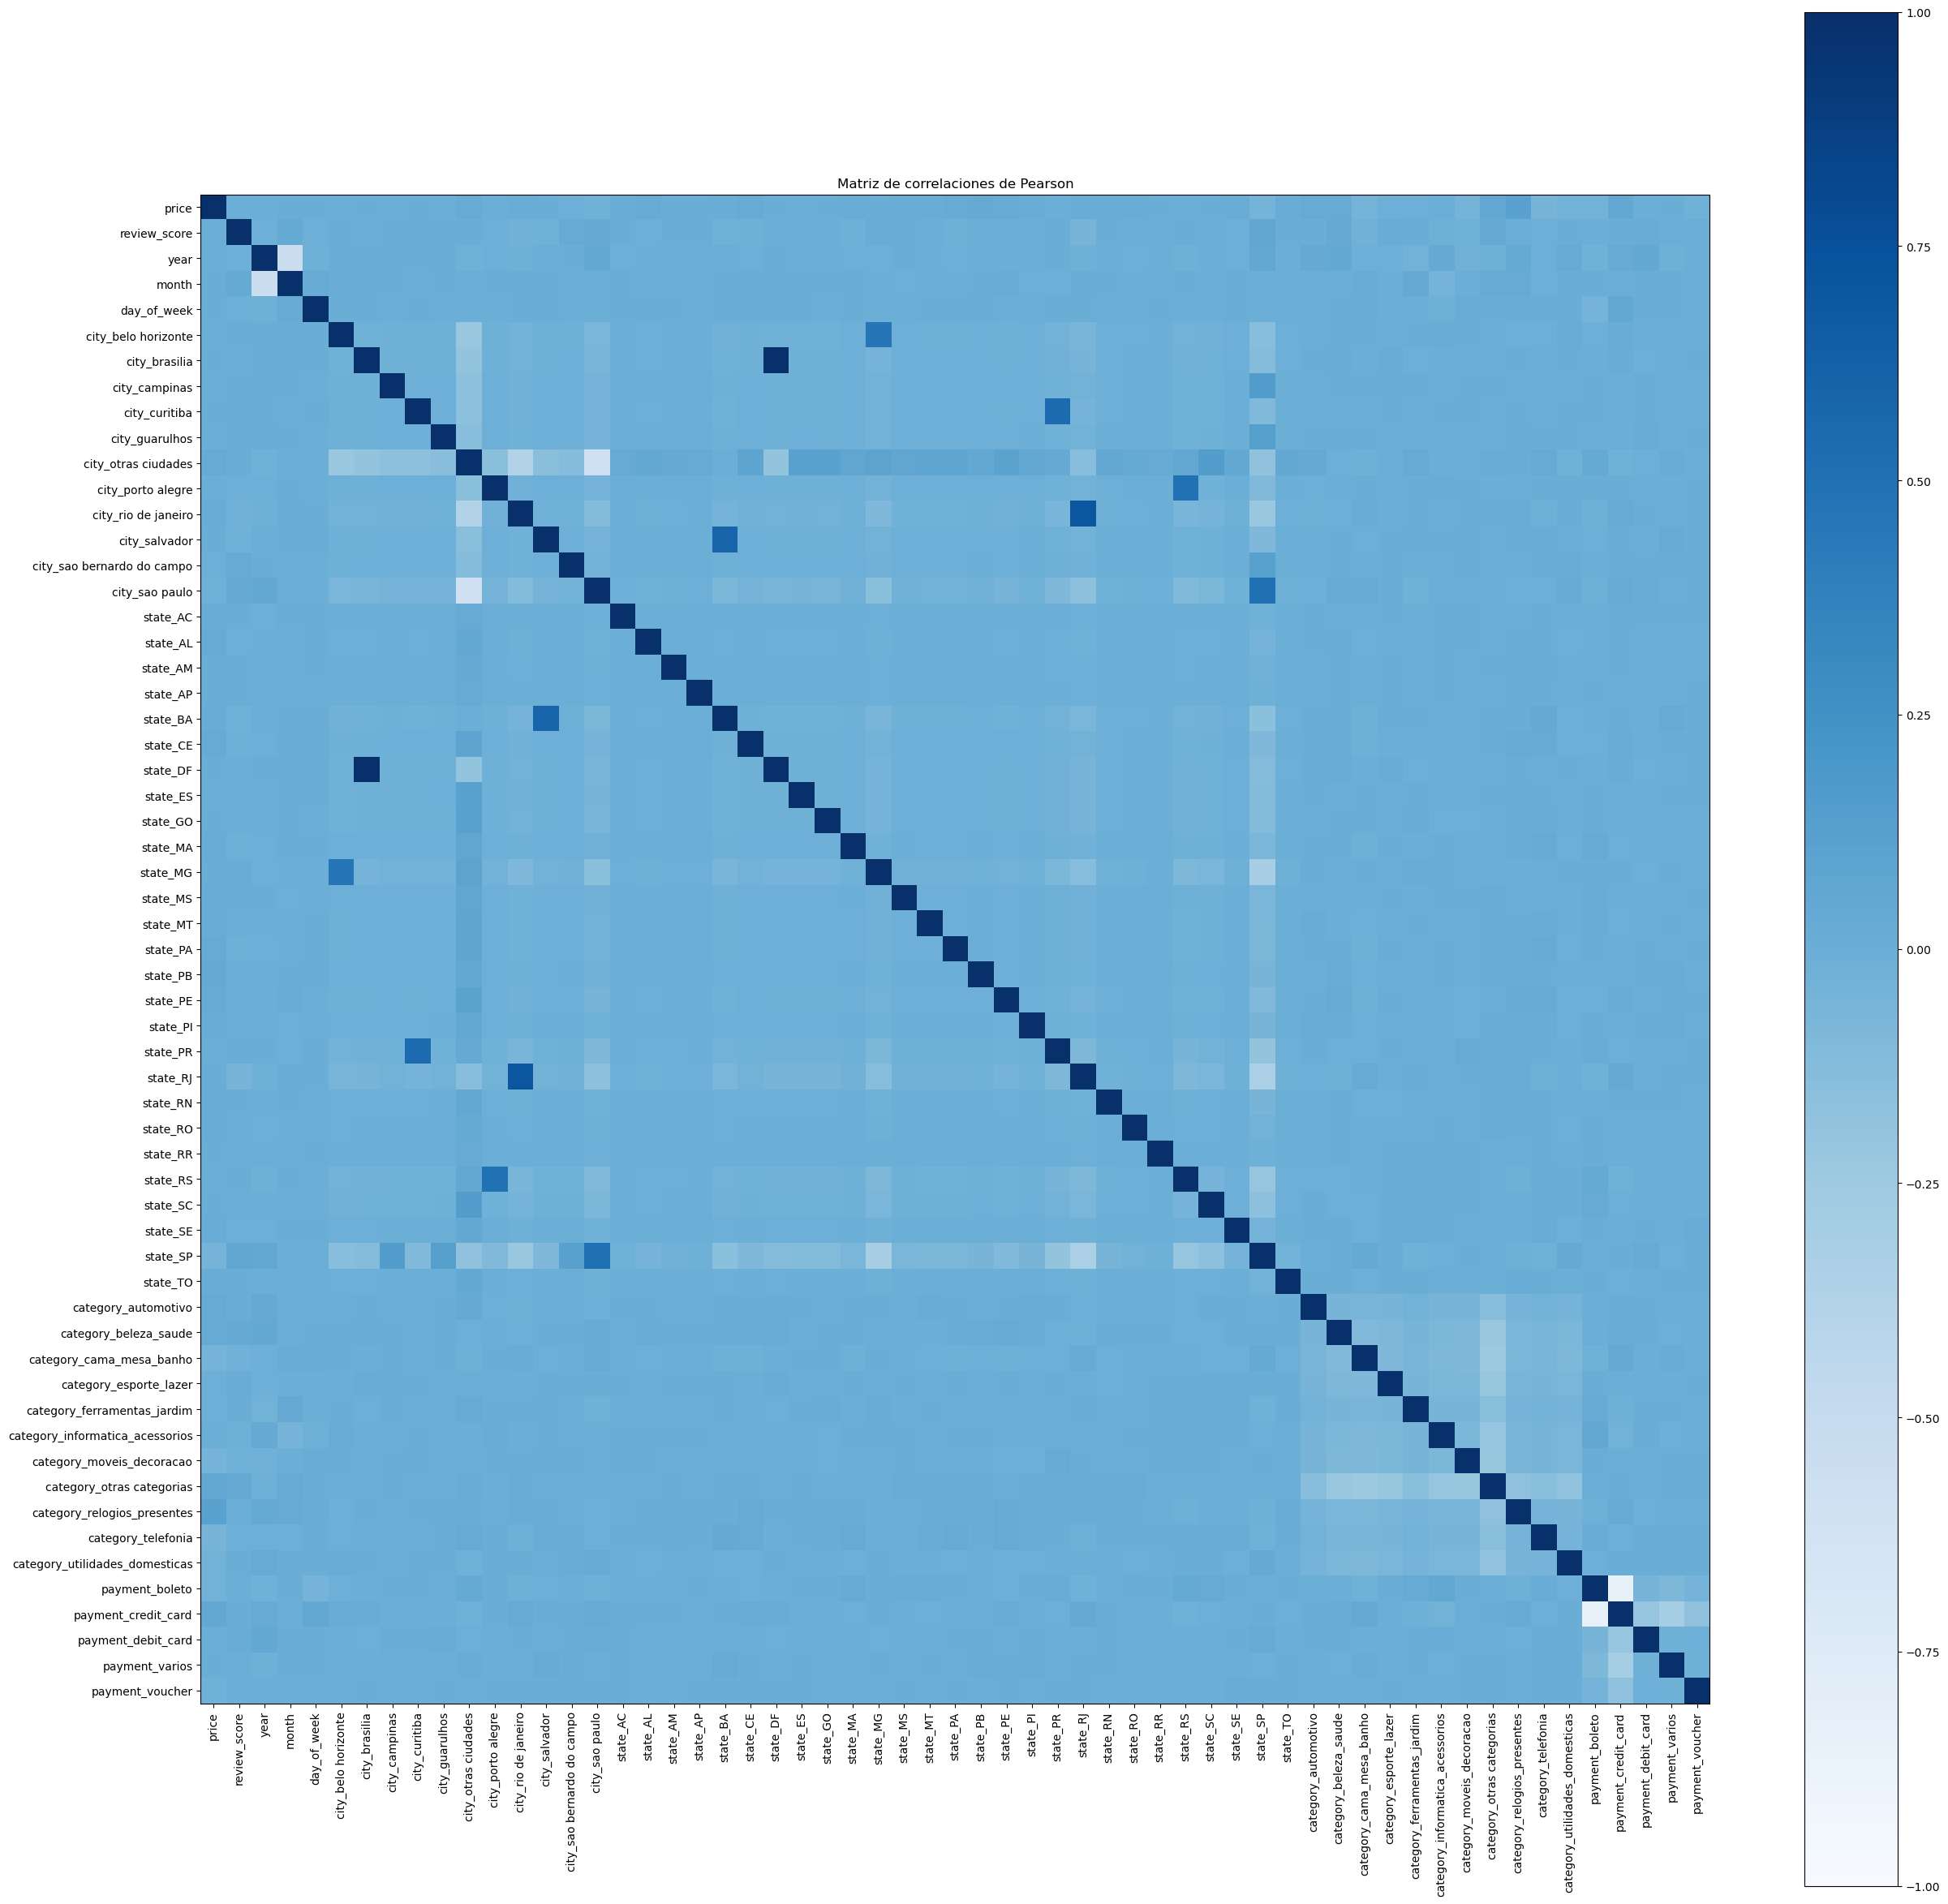

In [36]:
matriz_correlaciones = x_estandarizado.corr(method='pearson')
n_ticks = len(x_estandarizado.columns)
plt.figure( figsize=(30, 30) )
plt.xticks(range(n_ticks), x_estandarizado.columns, rotation='vertical')
plt.yticks(range(n_ticks), x_estandarizado.columns)
plt.colorbar(plt.imshow(matriz_correlaciones, interpolation='nearest', 
                            vmin=-1., vmax=1., 
                            cmap=plt.get_cmap('Blues')))
_ = plt.title('Matriz de correlaciones de Pearson')

Observamos la existencia de outliers o valores atípicos en variables como la del precio, precio del porte, pago total y estado del pedido.

Comprobamos la normalidad de las variables

In [37]:
for column in x_estandarizado.columns:
    data = x_estandarizado[column]
    stat, p_value = shapiro(data)
    print(f'Columna: {column}')
    print(f'  Estadístico de prueba: {stat}')
    print(f'  Valor p: {p_value}')
    alpha = 0.05
    if p_value > alpha:
        print("  No podemos rechazar la hipótesis nula. Los datos parecen provenir de una distribución normal.")
    else:
        print("  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.")

    print('\n')

Columna: price
  Estadístico de prueba: 0.4649443030357361
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.


Columna: review_score
  Estadístico de prueba: 0.6971461772918701
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.


Columna: year
  Estadístico de prueba: 0.6473172903060913
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.


Columna: month
  Estadístico de prueba: 0.9513822197914124
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.


Columna: day_of_week
  Estadístico de prueba: 0.9192005395889282
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.


Columna: city_belo horizonte
  Estadístico de prueba: 0.15147095918655396
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una 

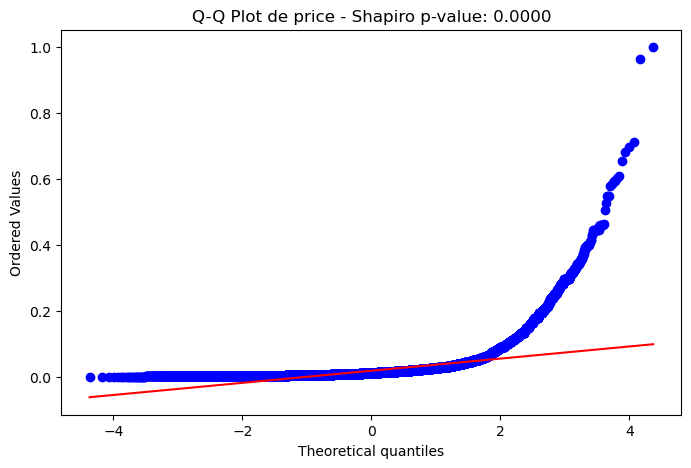

Columna: price
  Estadístico de prueba: 0.4649443030357361
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




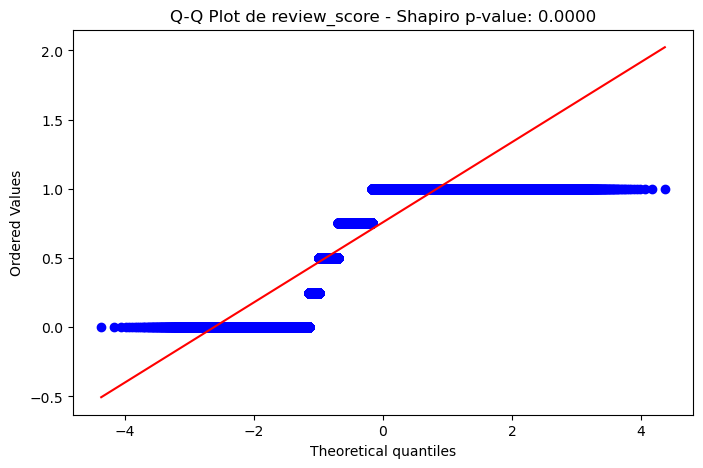

Columna: review_score
  Estadístico de prueba: 0.6971461772918701
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




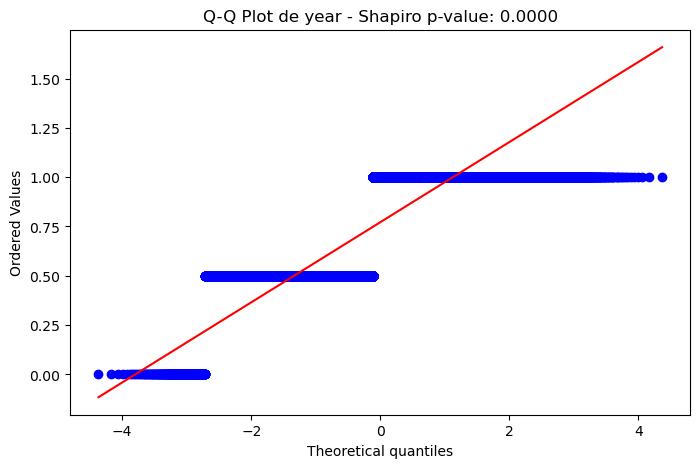

Columna: year
  Estadístico de prueba: 0.6473172903060913
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




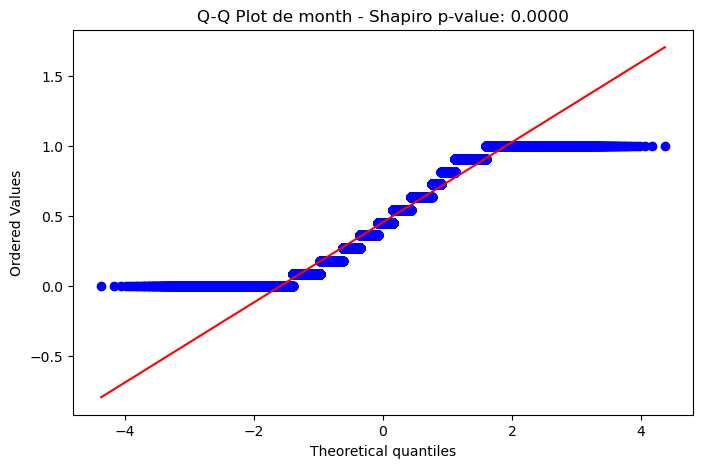

Columna: month
  Estadístico de prueba: 0.9513822197914124
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




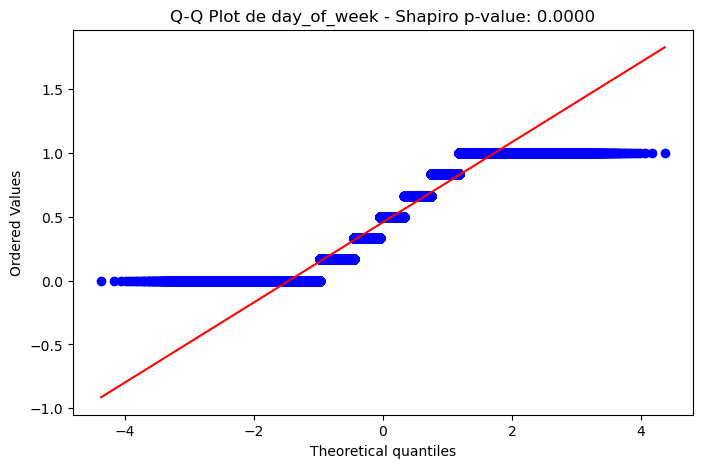

Columna: day_of_week
  Estadístico de prueba: 0.9192005395889282
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




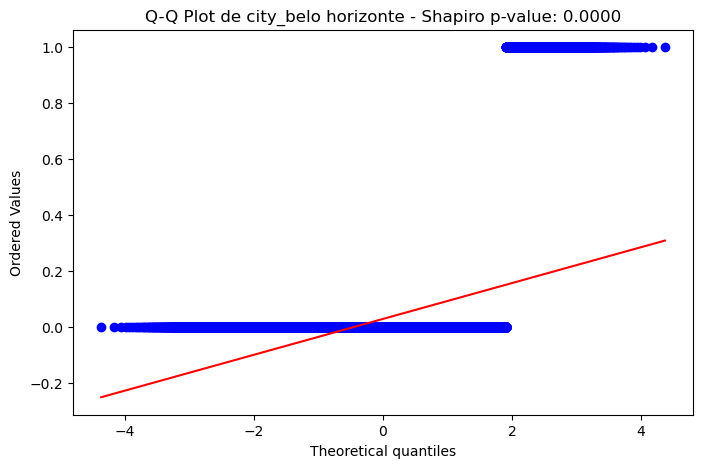

Columna: city_belo horizonte
  Estadístico de prueba: 0.15147095918655396
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




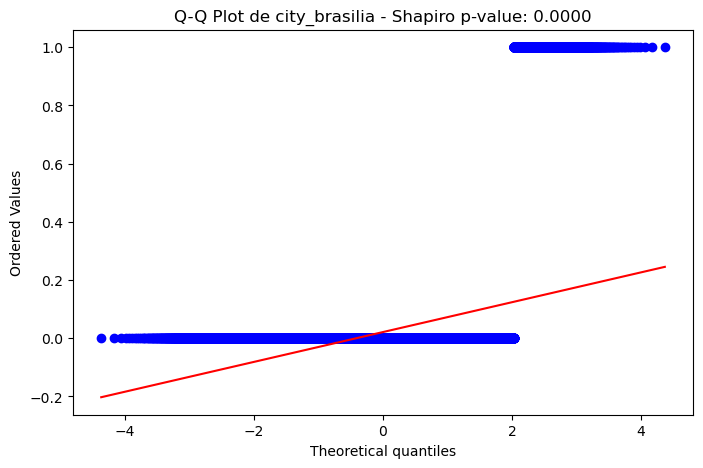

Columna: city_brasilia
  Estadístico de prueba: 0.12552744150161743
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




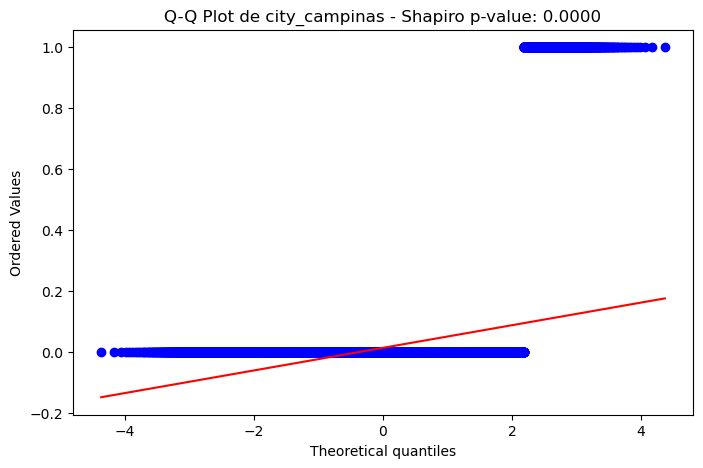

Columna: city_campinas
  Estadístico de prueba: 0.09532696008682251
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




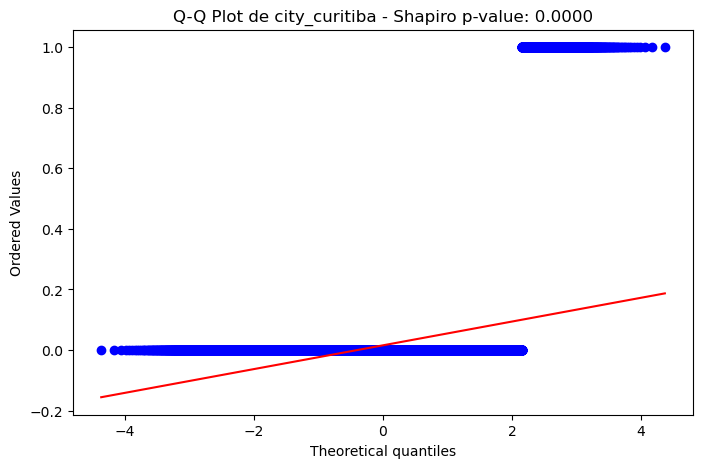

Columna: city_curitiba
  Estadístico de prueba: 0.10007482767105103
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




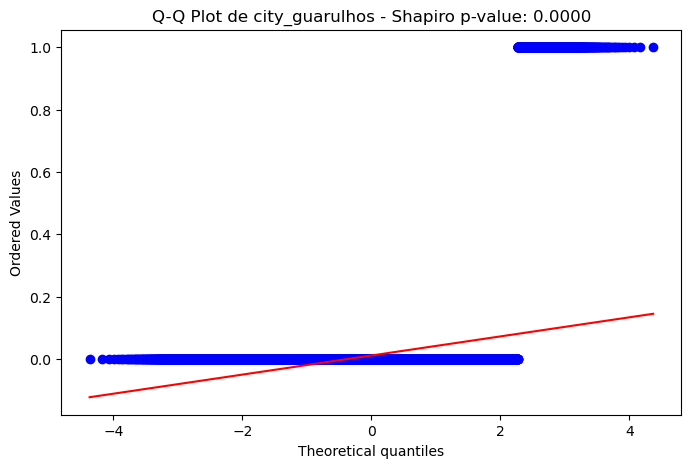

Columna: city_guarulhos
  Estadístico de prueba: 0.08088654279708862
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




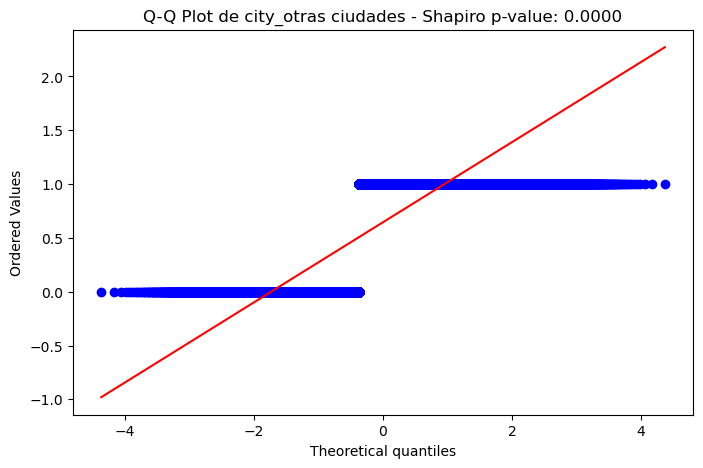

Columna: city_otras ciudades
  Estadístico de prueba: 0.6062270998954773
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




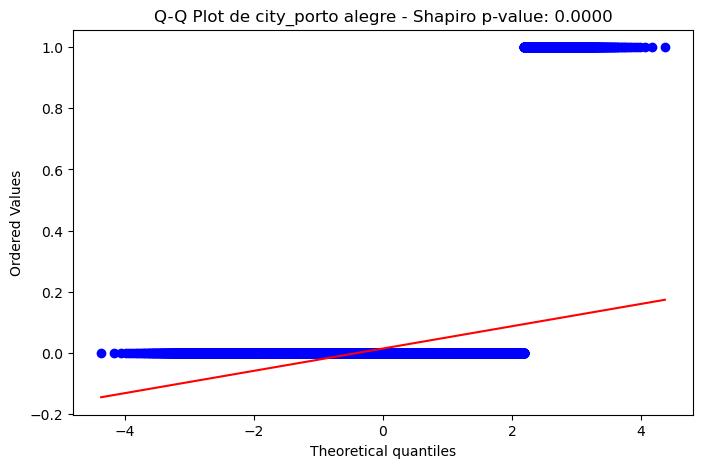

Columna: city_porto alegre
  Estadístico de prueba: 0.09402692317962646
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




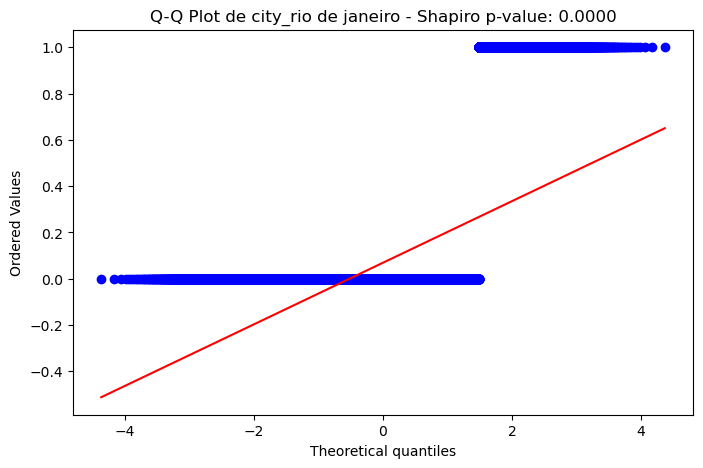

Columna: city_rio de janeiro
  Estadístico de prueba: 0.2748209834098816
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




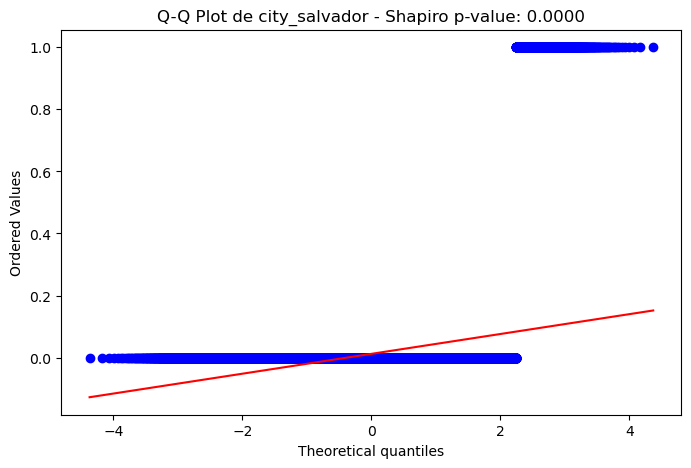

Columna: city_salvador
  Estadístico de prueba: 0.08398222923278809
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




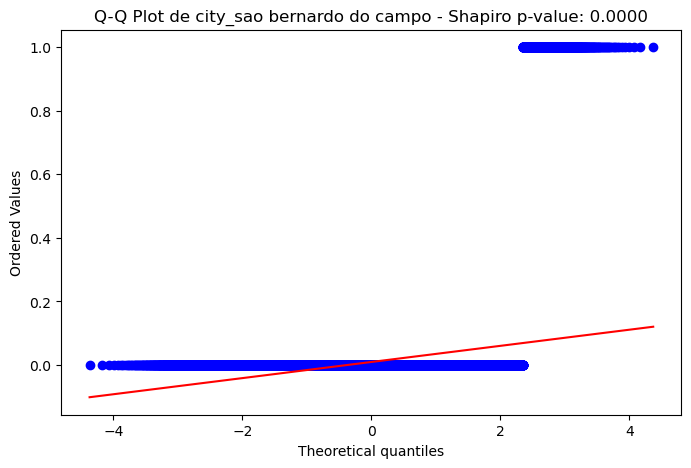

Columna: city_sao bernardo do campo
  Estadístico de prueba: 0.06880754232406616
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




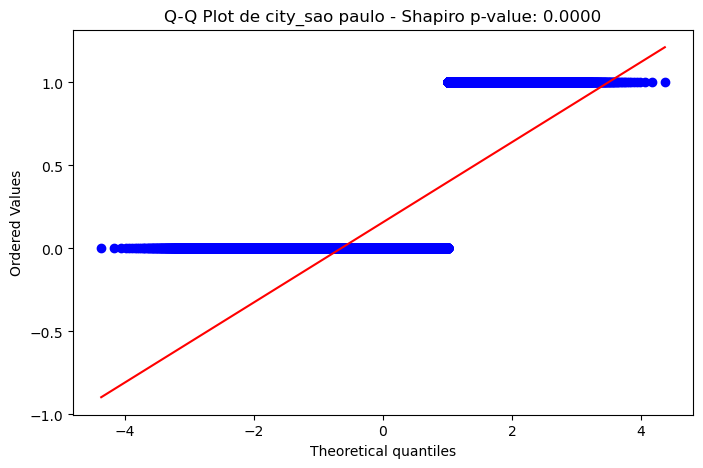

Columna: city_sao paulo
  Estadístico de prueba: 0.43777304887771606
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




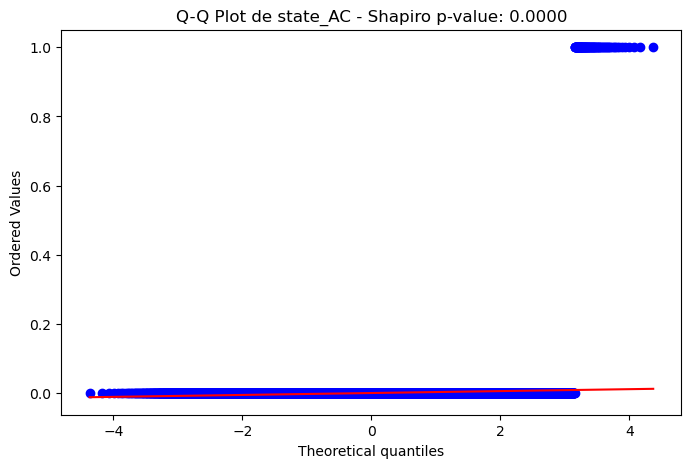

Columna: state_AC
  Estadístico de prueba: 0.009535729885101318
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




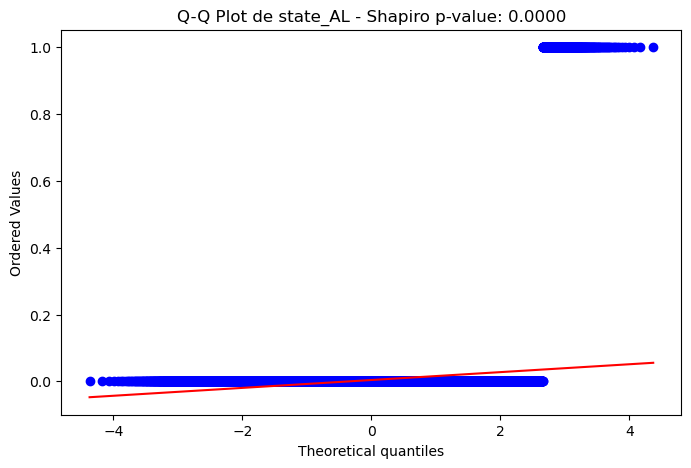

Columna: state_AL
  Estadístico de prueba: 0.03509879112243652
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




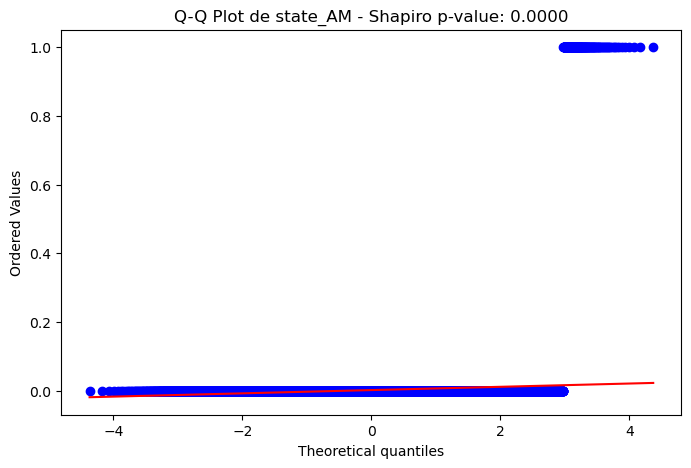

Columna: state_AM
  Estadístico de prueba: 0.015569865703582764
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




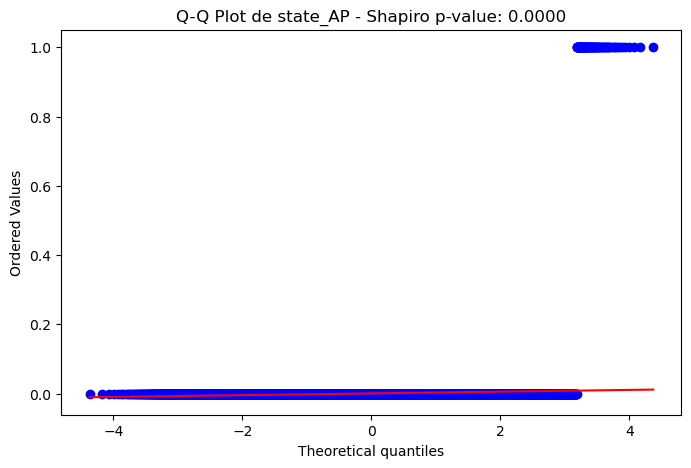

Columna: state_AP
  Estadístico de prueba: 0.00872582197189331
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




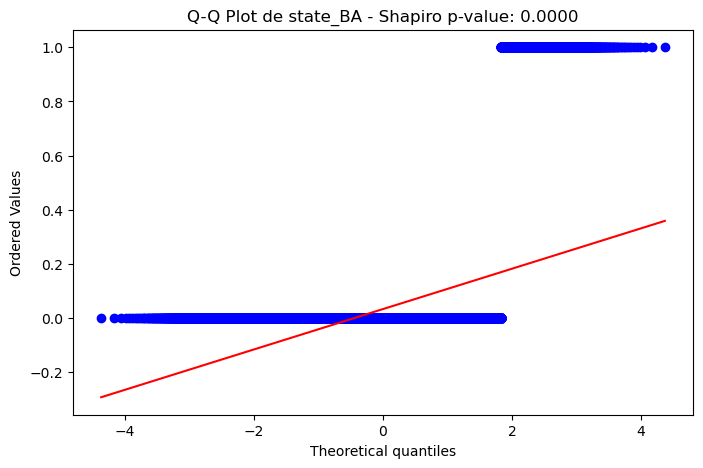

Columna: state_BA
  Estadístico de prueba: 0.17152154445648193
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




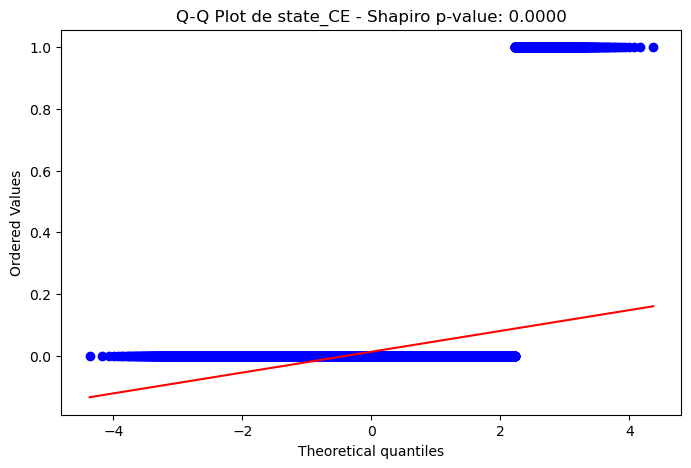

Columna: state_CE
  Estadístico de prueba: 0.08792752027511597
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




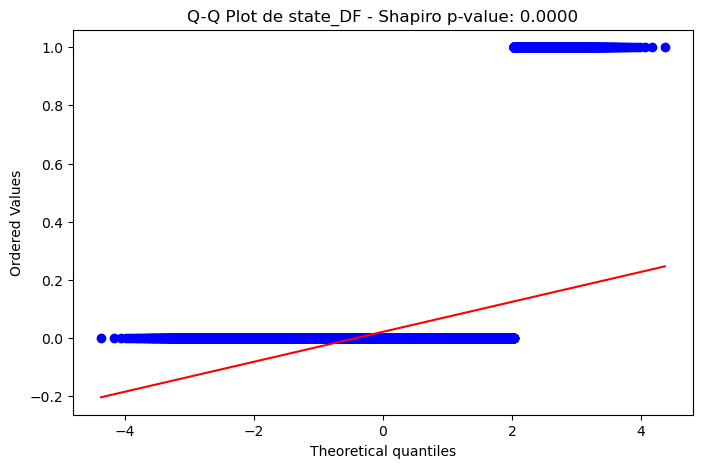

Columna: state_DF
  Estadístico de prueba: 0.1260191798210144
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




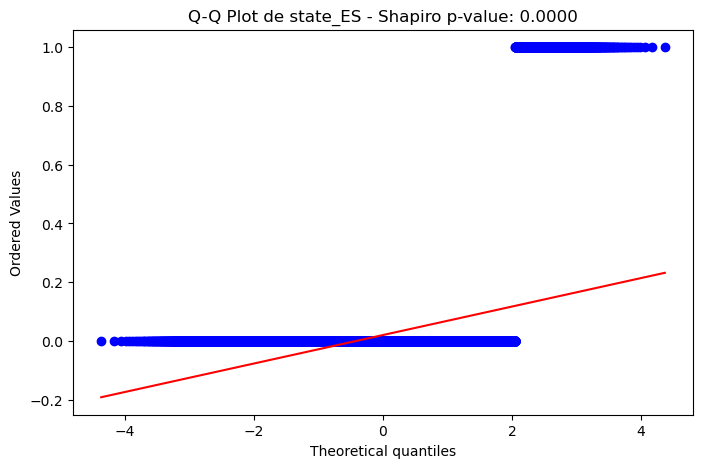

Columna: state_ES
  Estadístico de prueba: 0.11975812911987305
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




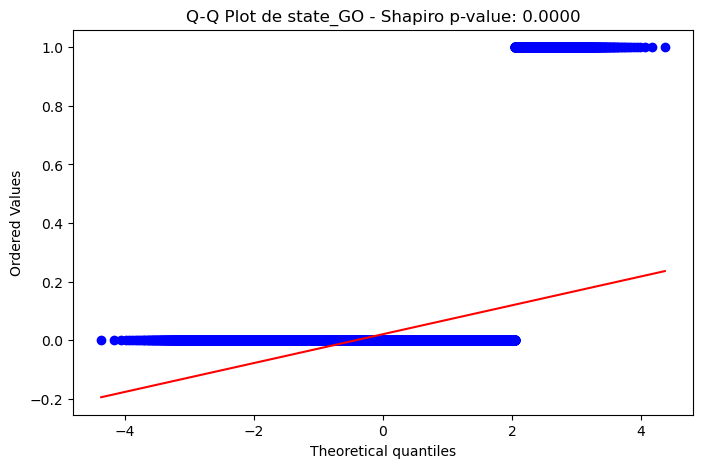

Columna: state_GO
  Estadístico de prueba: 0.1214141845703125
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




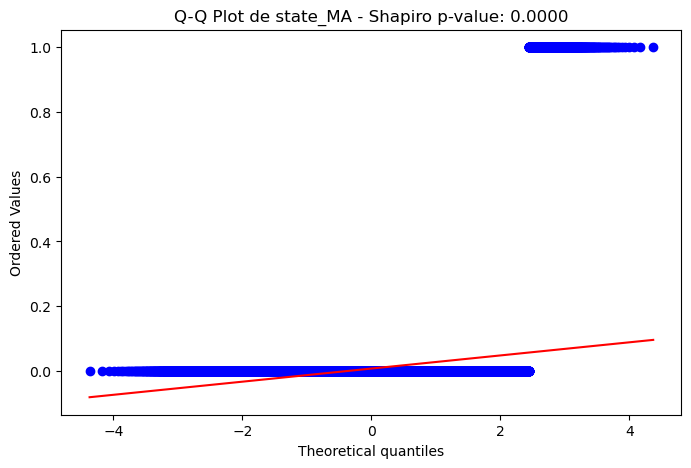

Columna: state_MA
  Estadístico de prueba: 0.05655980110168457
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




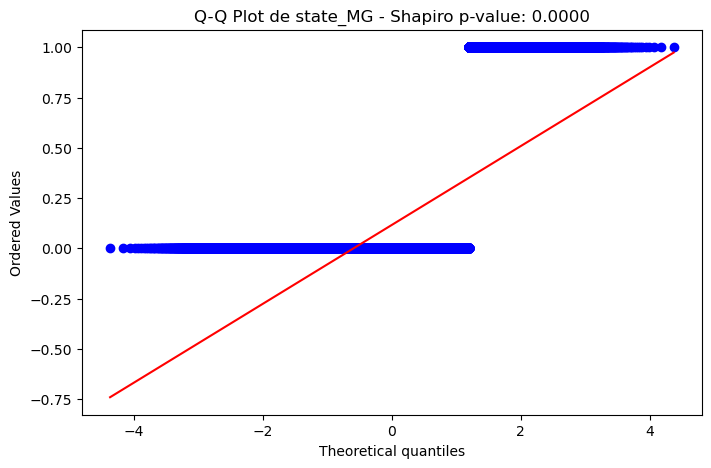

Columna: state_MG
  Estadístico de prueba: 0.37316399812698364
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




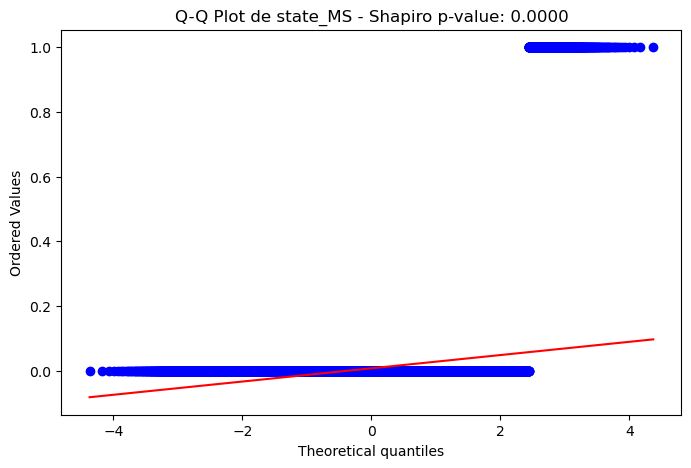

Columna: state_MS
  Estadístico de prueba: 0.05704253911972046
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




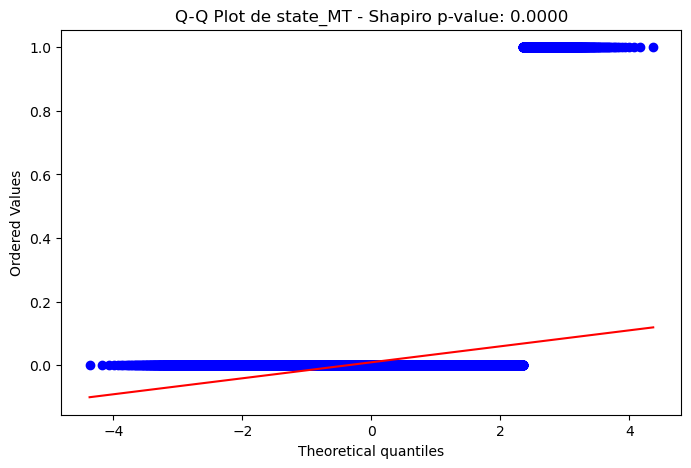

Columna: state_MT
  Estadístico de prueba: 0.06820899248123169
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




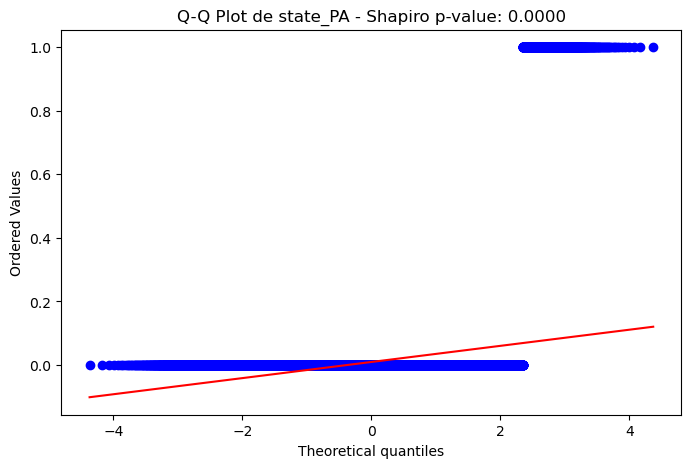

Columna: state_PA
  Estadístico de prueba: 0.06880754232406616
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




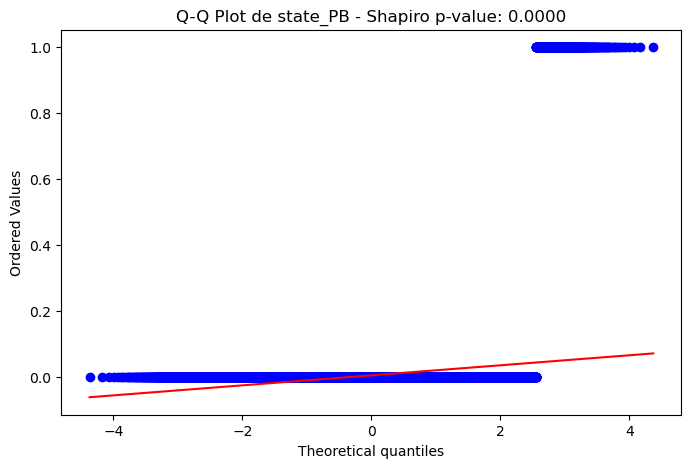

Columna: state_PB
  Estadístico de prueba: 0.04393357038497925
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




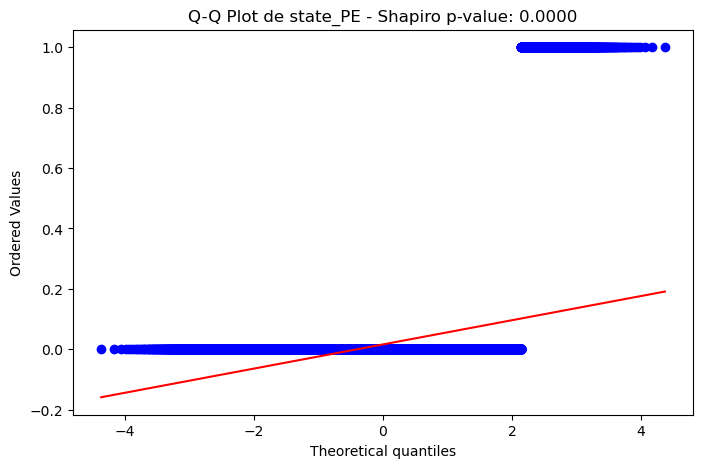

Columna: state_PE
  Estadístico de prueba: 0.10180157423019409
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




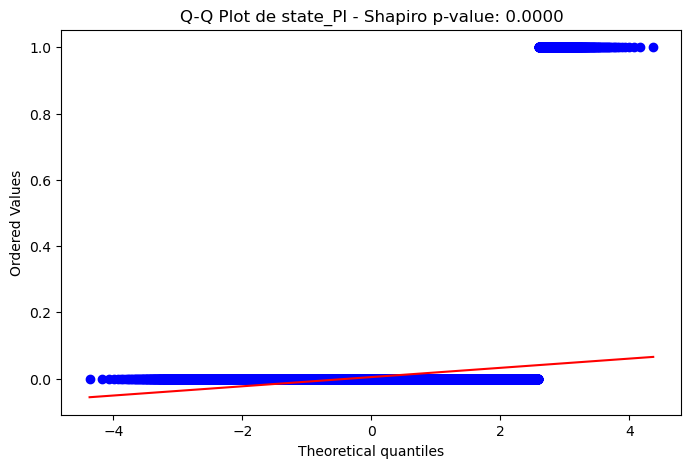

Columna: state_PI
  Estadístico de prueba: 0.04065752029418945
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




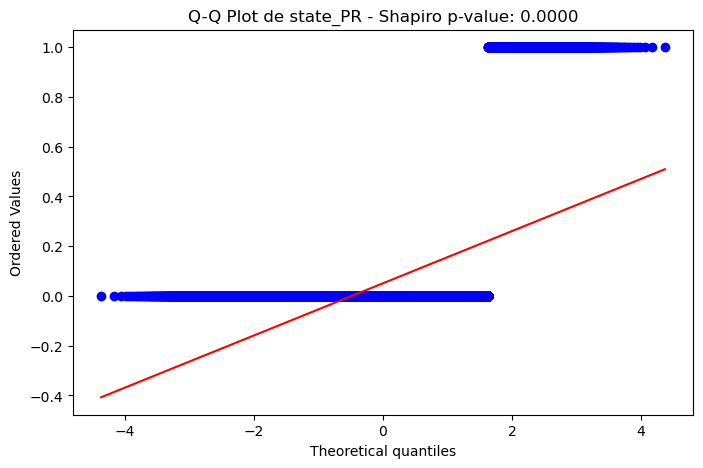

Columna: state_PR
  Estadístico de prueba: 0.22705078125
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




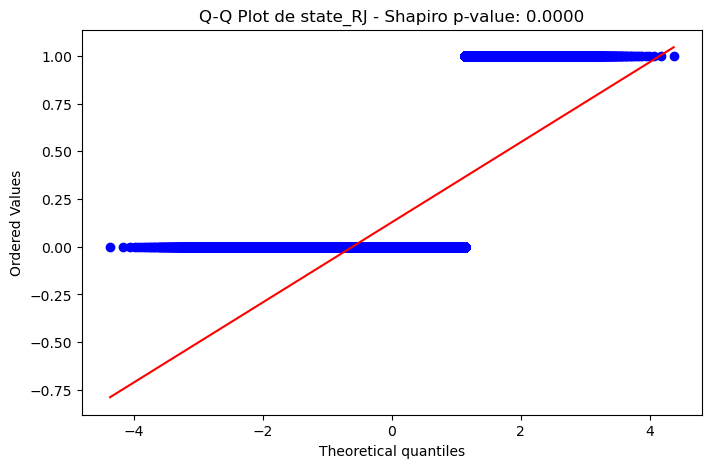

Columna: state_RJ
  Estadístico de prueba: 0.39331990480422974
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




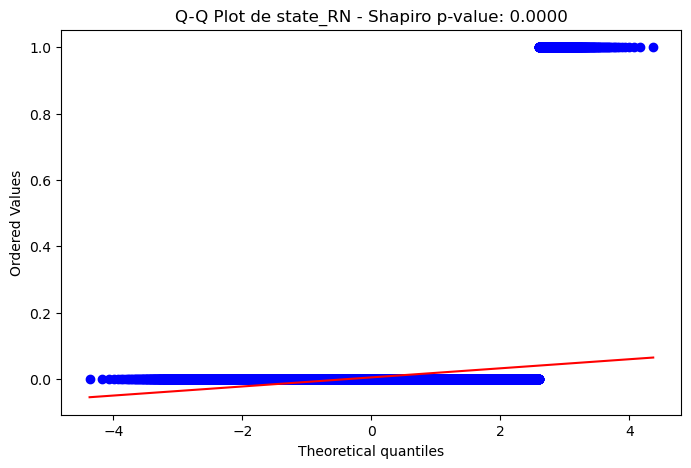

Columna: state_RN
  Estadístico de prueba: 0.040052831172943115
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




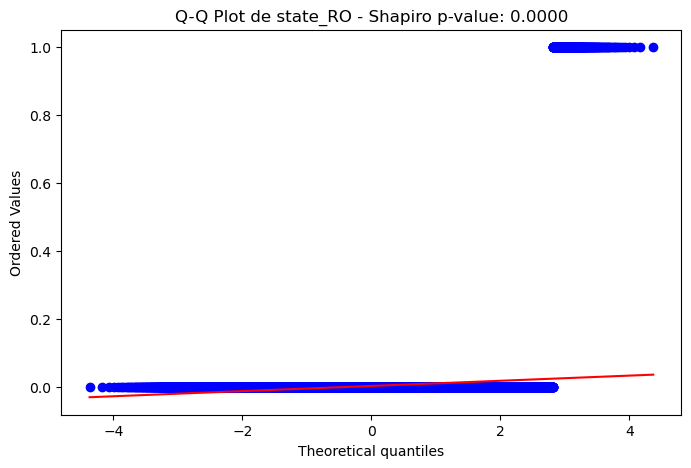

Columna: state_RO
  Estadístico de prueba: 0.023733913898468018
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




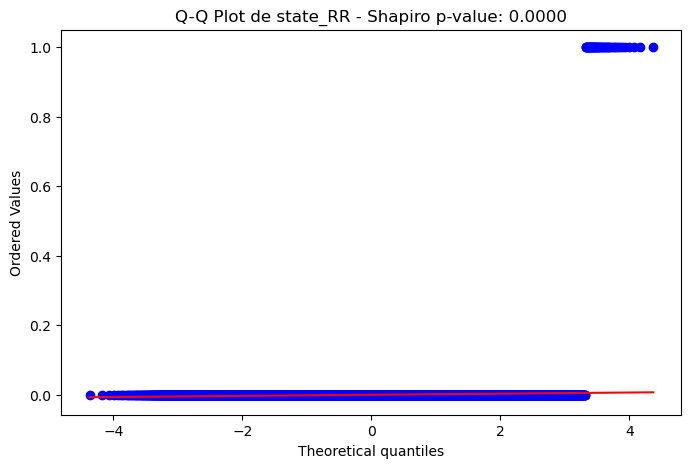

Columna: state_RR
  Estadístico de prueba: 0.0057942867279052734
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




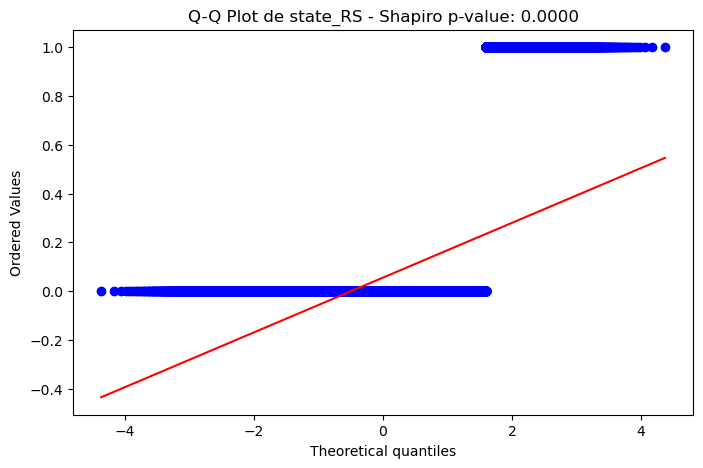

Columna: state_RS
  Estadístico de prueba: 0.23988771438598633
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




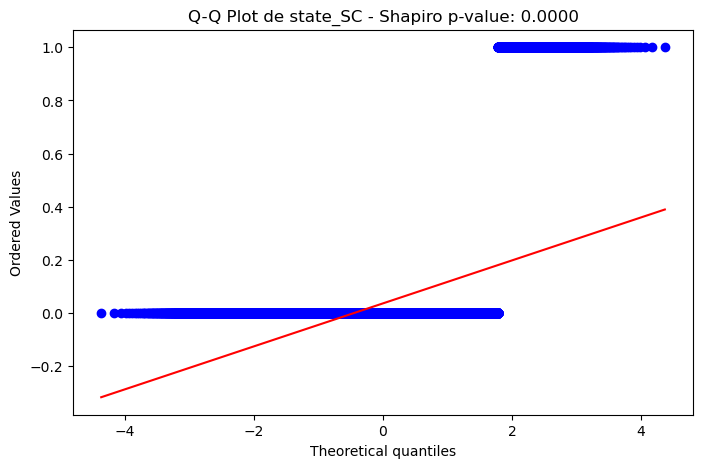

Columna: state_SC
  Estadístico de prueba: 0.183388352394104
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




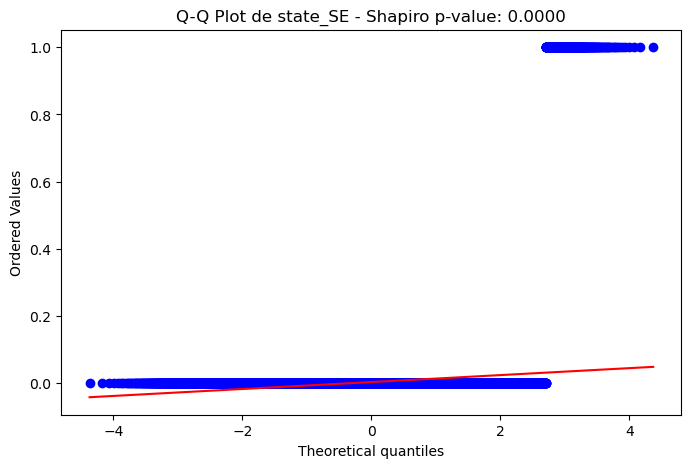

Columna: state_SE
  Estadístico de prueba: 0.031234264373779297
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




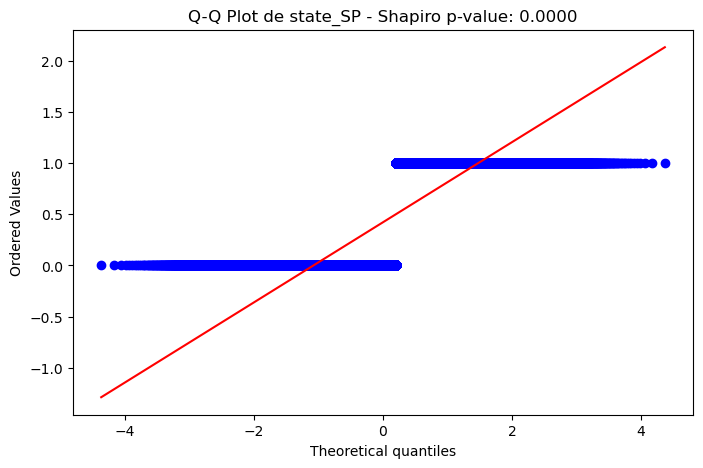

Columna: state_SP
  Estadístico de prueba: 0.627933144569397
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




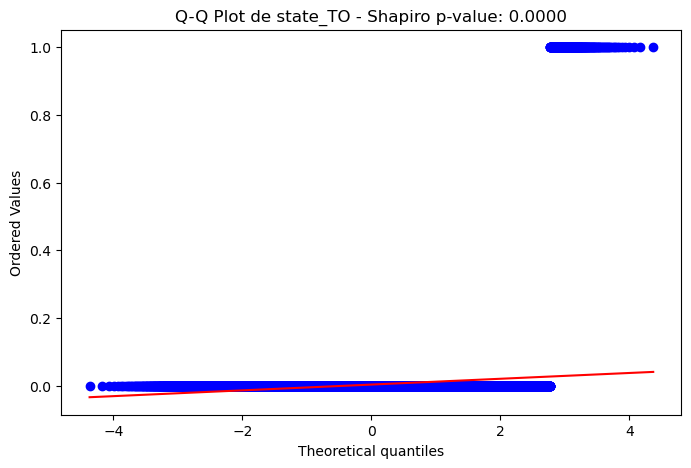

Columna: state_TO
  Estadístico de prueba: 0.02639394998550415
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




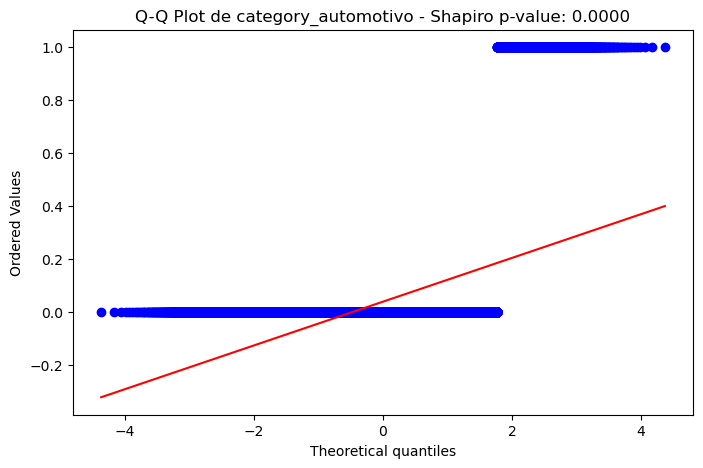

Columna: category_automotivo
  Estadístico de prueba: 0.18698453903198242
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




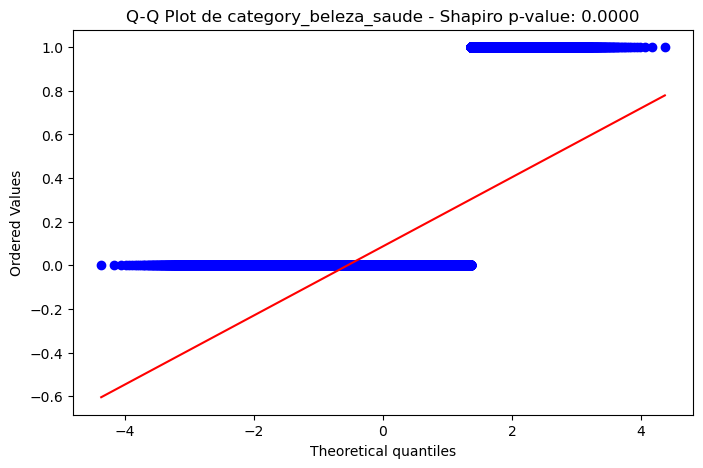

Columna: category_beleza_saude
  Estadístico de prueba: 0.3157894015312195
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




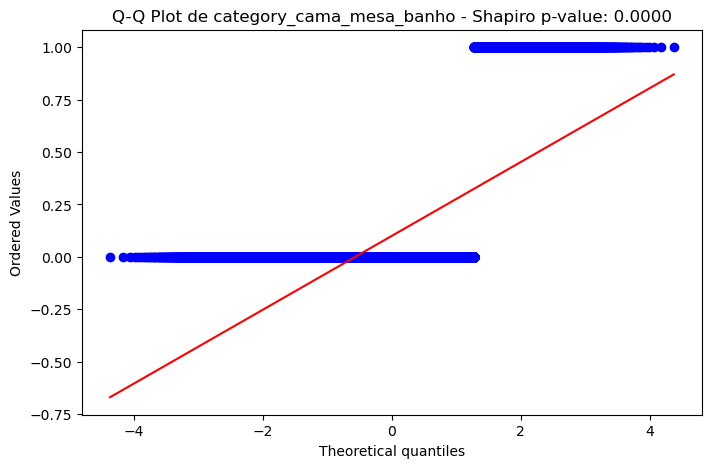

Columna: category_cama_mesa_banho
  Estadístico de prueba: 0.34327131509780884
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




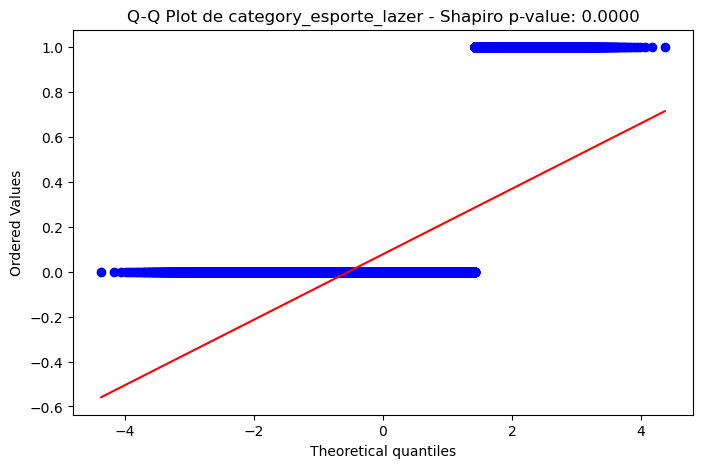

Columna: category_esporte_lazer
  Estadístico de prueba: 0.2957431674003601
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




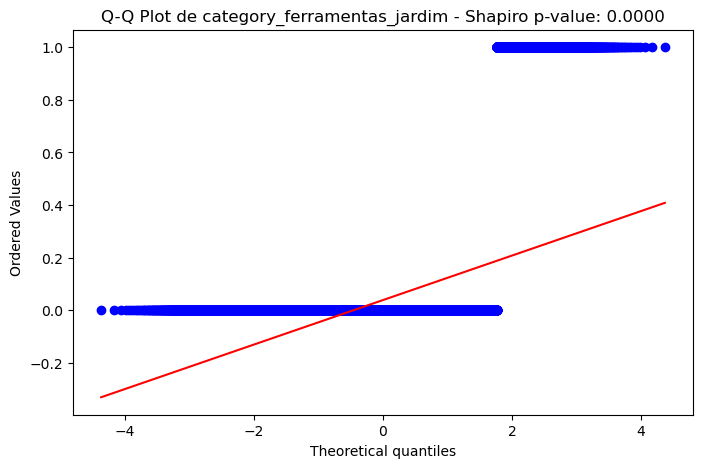

Columna: category_ferramentas_jardim
  Estadístico de prueba: 0.19039905071258545
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




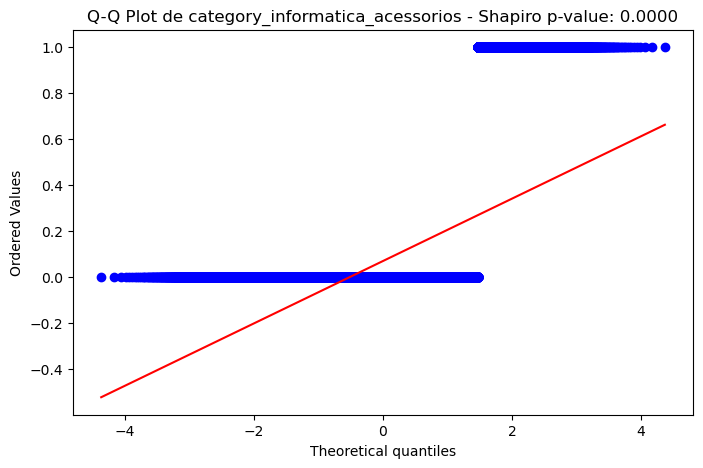

Columna: category_informatica_acessorios
  Estadístico de prueba: 0.27900660037994385
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




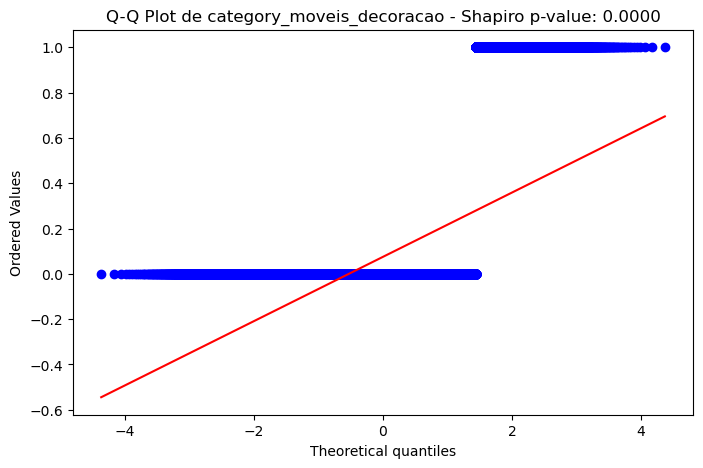

Columna: category_moveis_decoracao
  Estadístico de prueba: 0.289257287979126
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




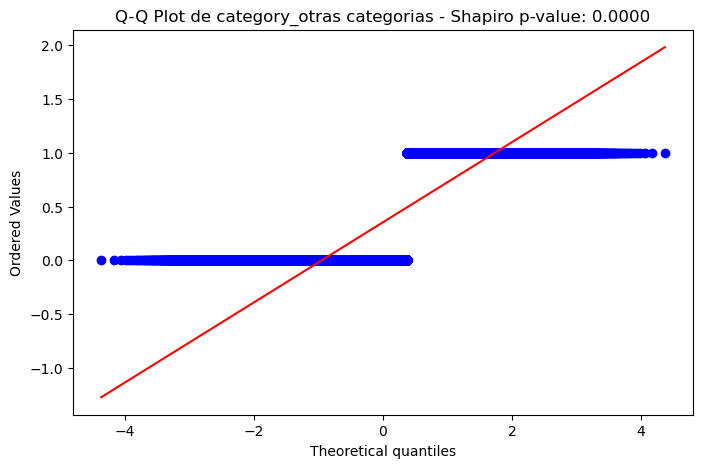

Columna: category_otras categorias
  Estadístico de prueba: 0.6046352386474609
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




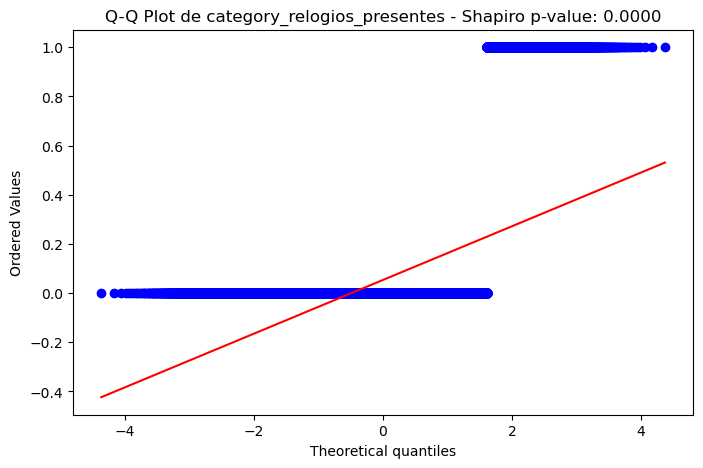

Columna: category_relogios_presentes
  Estadístico de prueba: 0.23452329635620117
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




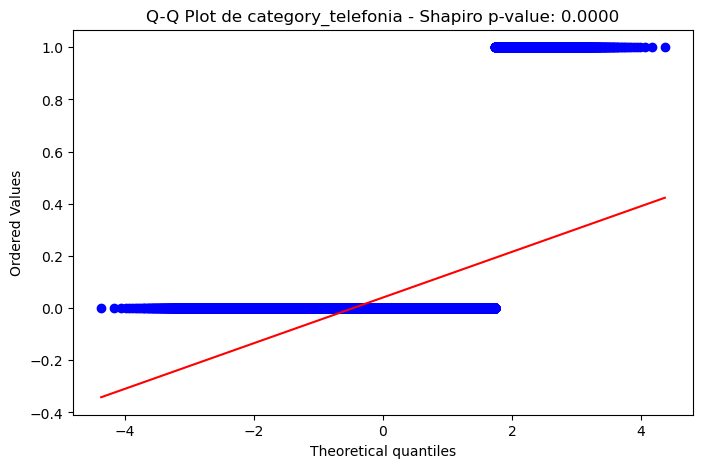

Columna: category_telefonia
  Estadístico de prueba: 0.19583135843276978
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




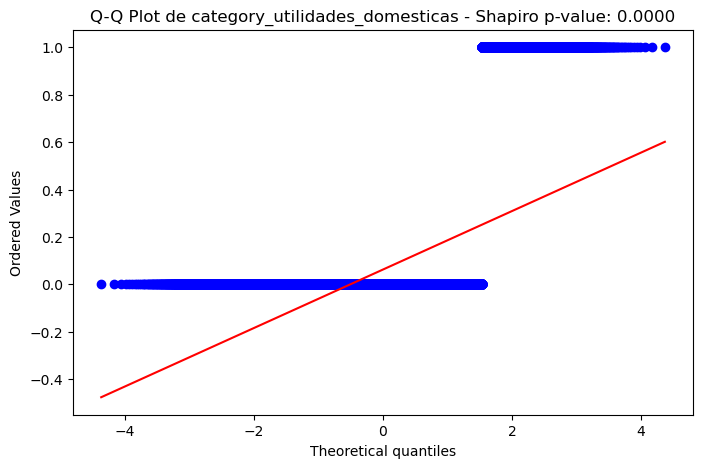

Columna: category_utilidades_domesticas
  Estadístico de prueba: 0.25860583782196045
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




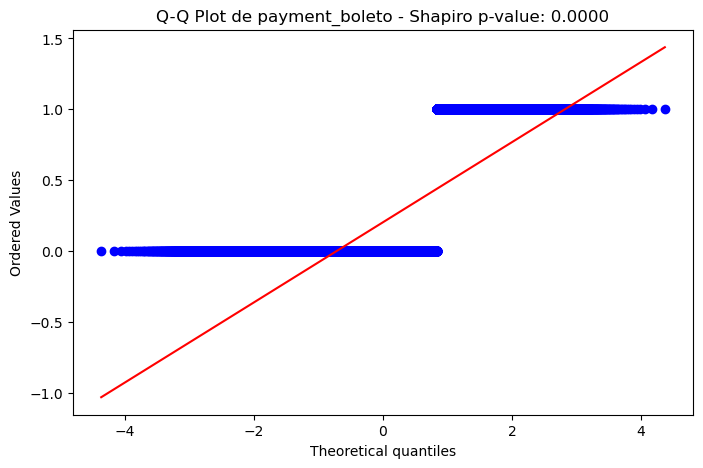

Columna: payment_boleto
  Estadístico de prueba: 0.4935048818588257
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




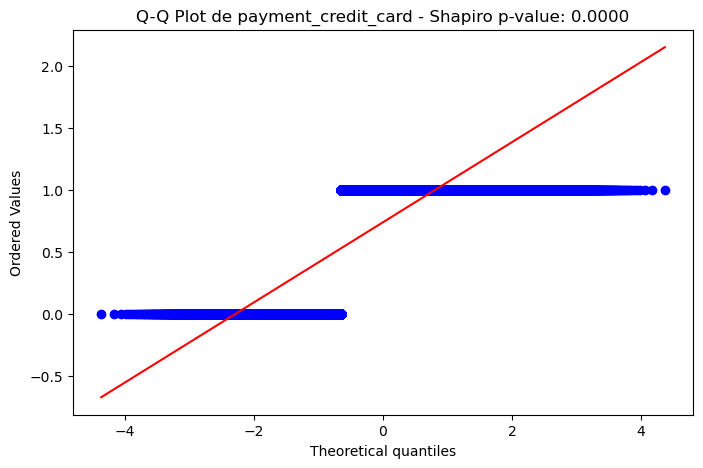

Columna: payment_credit_card
  Estadístico de prueba: 0.5452265739440918
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




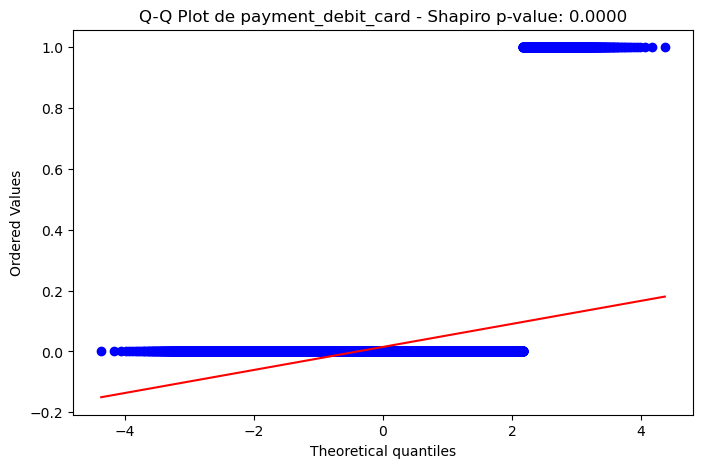

Columna: payment_debit_card
  Estadístico de prueba: 0.09705054759979248
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




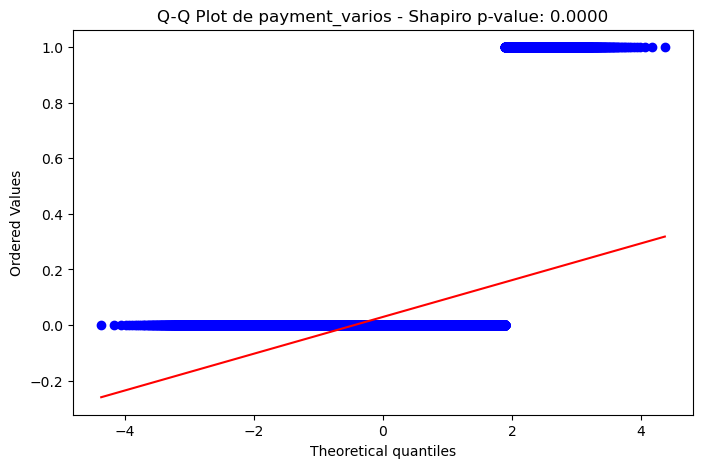

Columna: payment_varios
  Estadístico de prueba: 0.1555166244506836
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




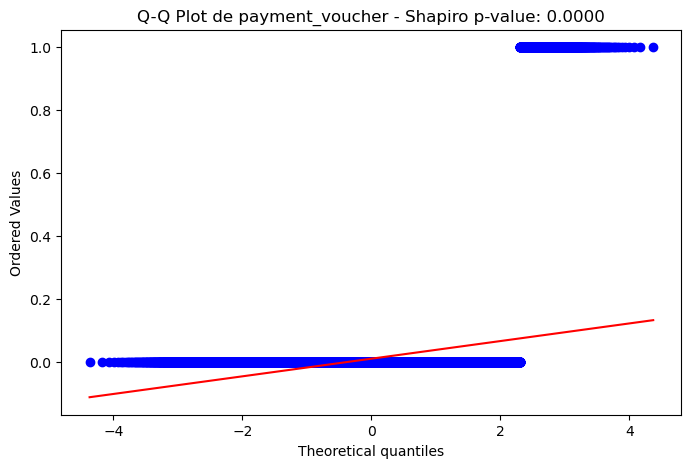

Columna: payment_voucher
  Estadístico de prueba: 0.07492333650588989
  Valor p: 0.0
  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.




In [38]:
for column in x_estandarizado.columns:
    data = x_estandarizado[column]
    stat, p_value = shapiro(data)
    plt.figure(figsize=(8, 5))
    probplot(data, plot=plt)
    plt.title(f'Q-Q Plot de {column} - Shapiro p-value: {p_value:.4f}')
    plt.show()

    print(f'Columna: {column}')
    print(f'  Estadístico de prueba: {stat}')
    print(f'  Valor p: {p_value}')

    alpha = 0.05
    if p_value > alpha:
        print("  No podemos rechazar la hipótesis nula. Los datos parecen provenir de una distribución normal.")
    else:
        print("  Rechazamos la hipótesis nula. Los datos no parecen provenir de una distribución normal.")

    print('\n')

In [39]:
x_estandarizado.to_csv('df_minmax_va.csv', index=False)